In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

from bcnf.simulation.physics import physics_ODE_simulation, calculate_point_of_impact
from bcnf.simulation.camera import record_trajectory
from bcnf.simulation.sampling import generate_data

generate_data(print_acc_rej=True, n=15)

100%|██████████| 1500/1500 [23:20<00:00,  1.07it/s, accepted=1500, ratio=0.222, rejected=5245]


Text(0.5, 0, '% of visibility')

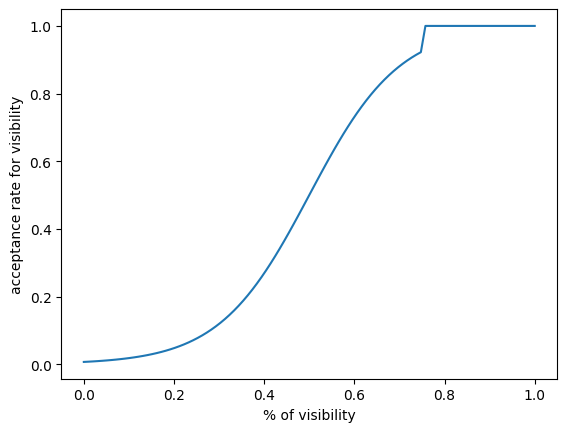

In [7]:
def mod_sigmoid(x):
    if x > 0.75:
        return 1
    else: 
        return 1 / (1 + np.exp(-(x-0.5)*10))
    
# plot mod_sigmoid
    
x = np.linspace(0, 1, 100)
y = [mod_sigmoid(i) for i in x]

plt.plot(x, y)
plt.ylabel('acceptance rate for visibility')
plt.xlabel('% of visibility')

Text(0.5, 0, '% of travel distance (reference: 50 m)')

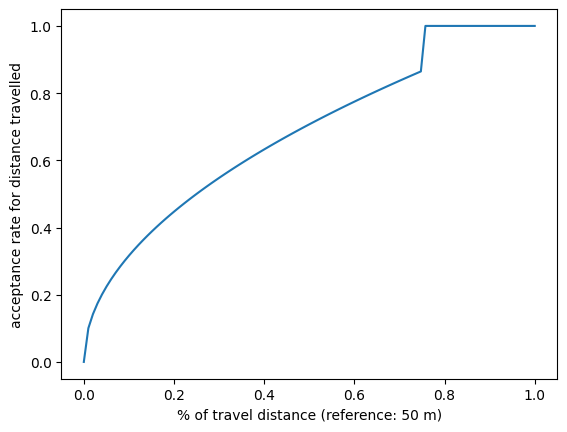

In [10]:
def mod_sqrt(x):
    if x > 0.75:
        return 1
    else: 
        return np.sqrt(x)
    
# plot mod_sigmoid
    
x = np.linspace(0, 1, 100)
y = [mod_sqrt(i) for i in x]

plt.plot(x, y)
plt.ylabel('acceptance rate for distance travelled')
plt.xlabel('% of travel distance (reference: 50 m)')

In [2]:
# load df from pickle

from bcnf.utils import get_dir
import pickle
import os

with open(os.path.join(get_dir('data', 'bcnf-data'), 'data.pkl'), 'rb') as f:
    data = pickle.load(f)

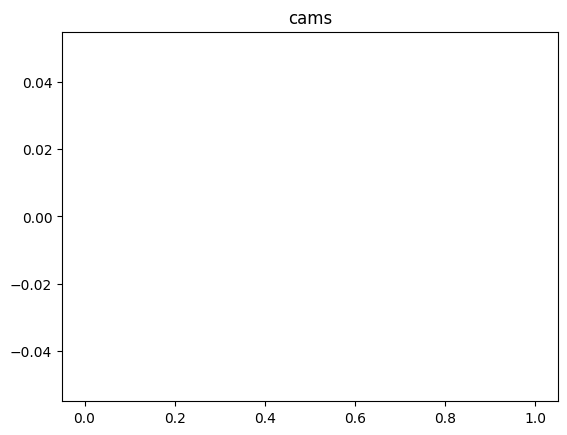

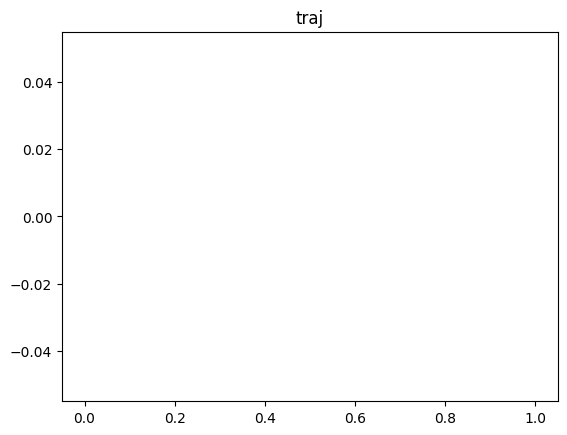

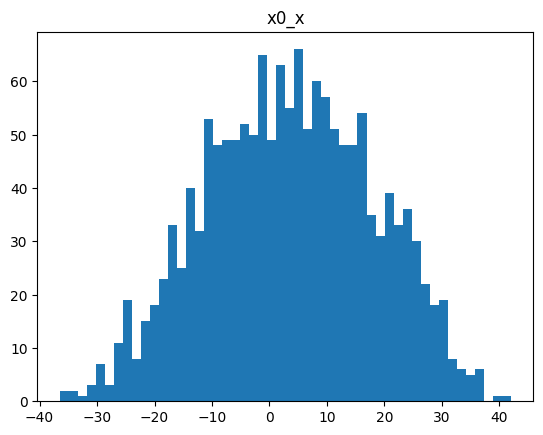

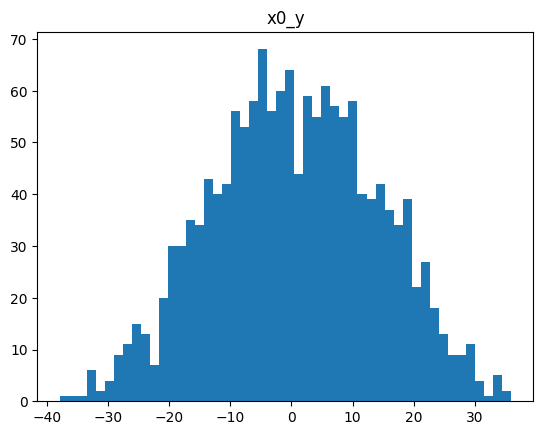

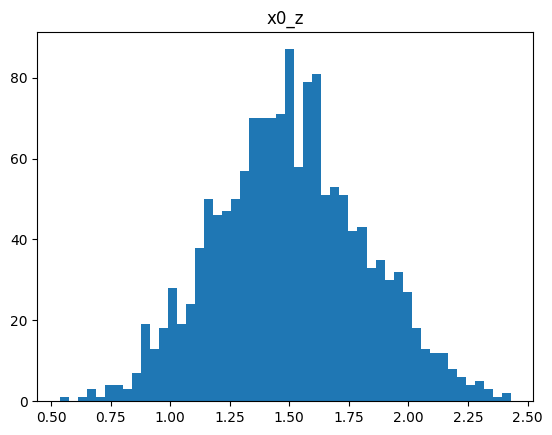

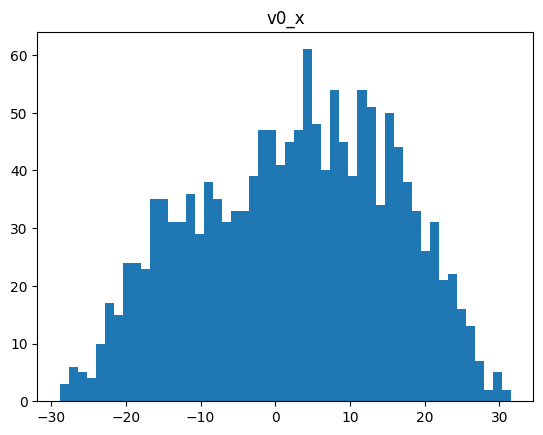

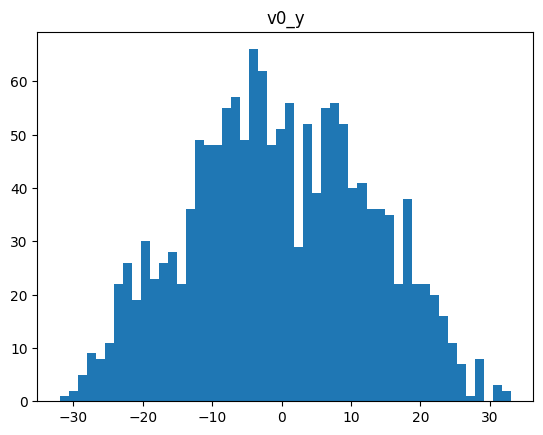

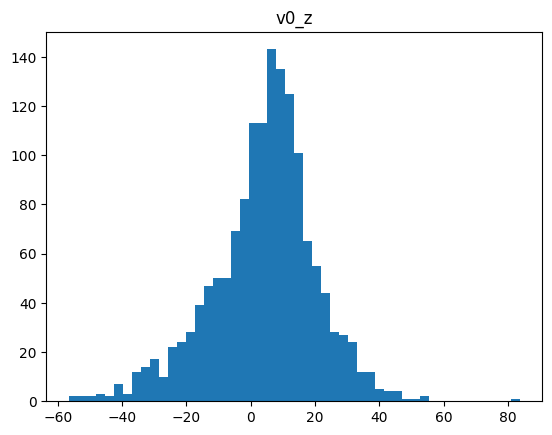

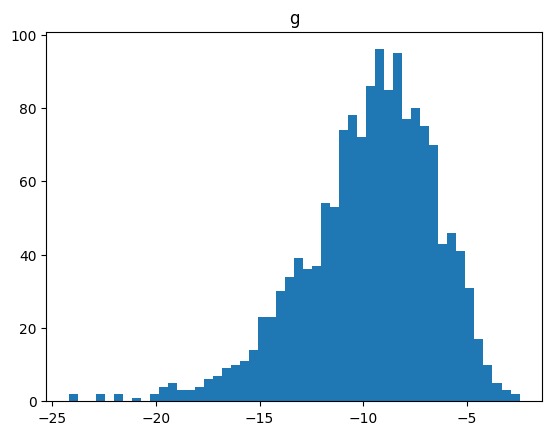

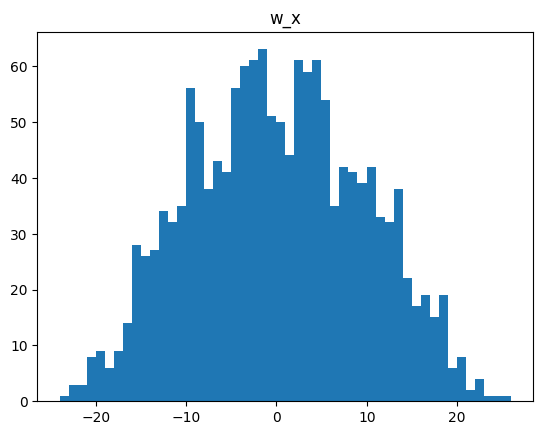

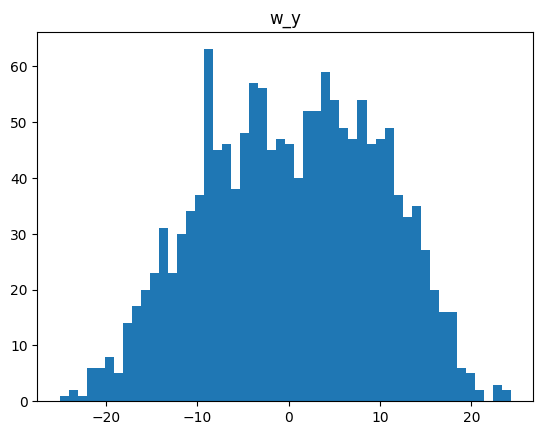

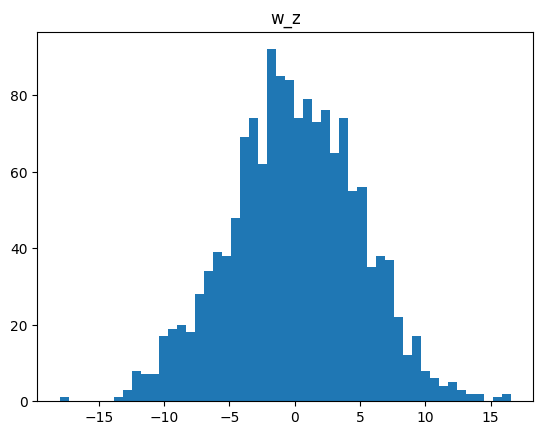

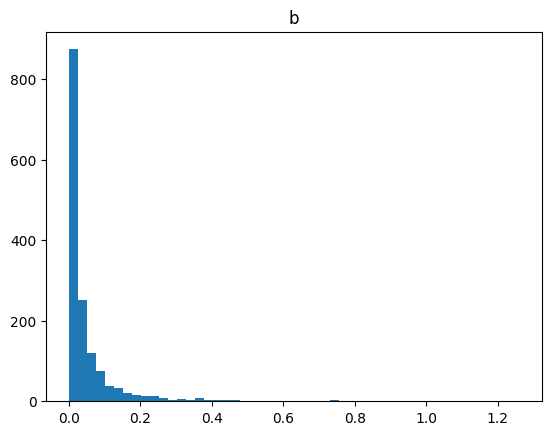

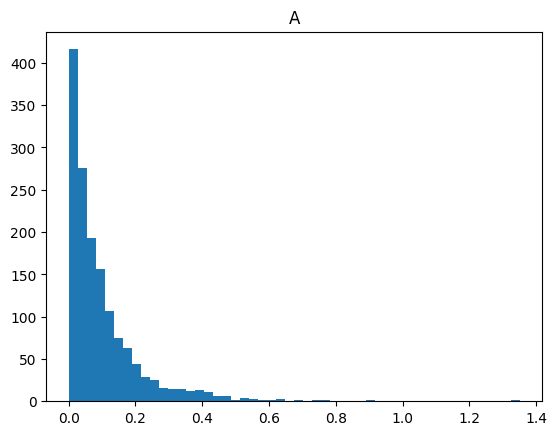

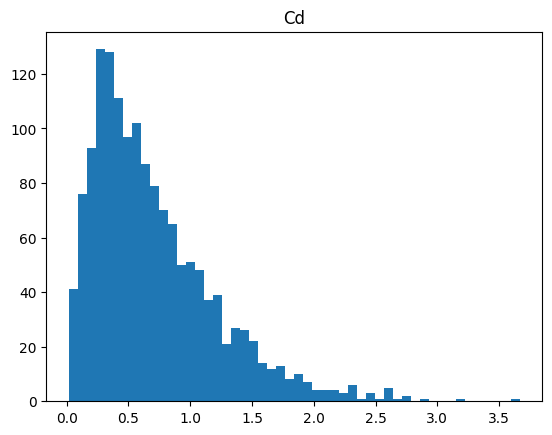

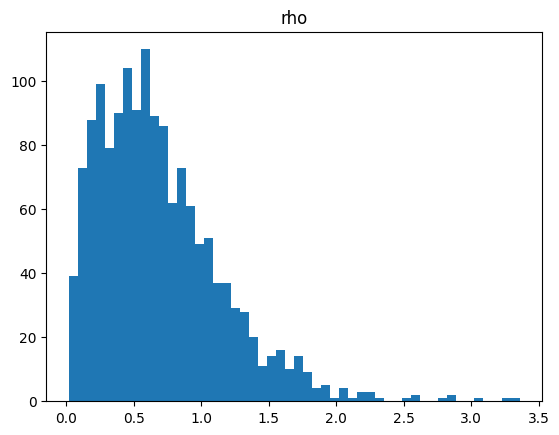

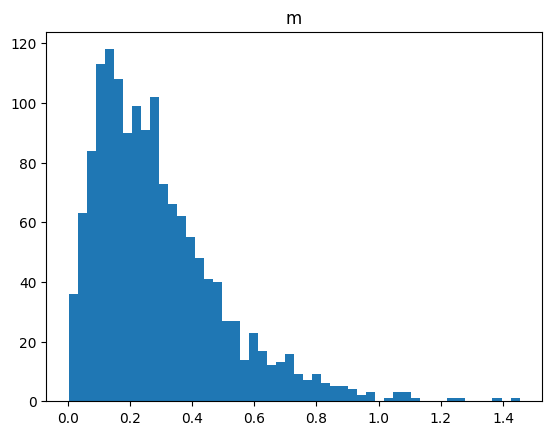

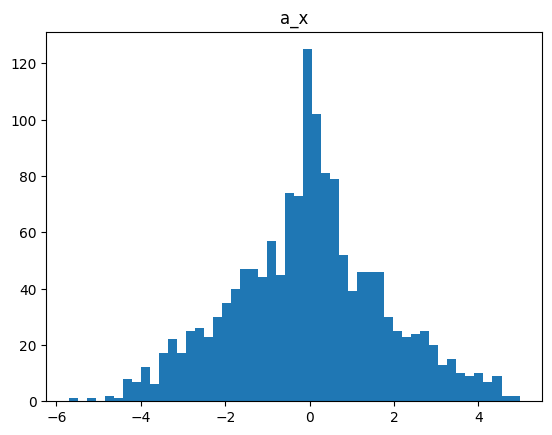

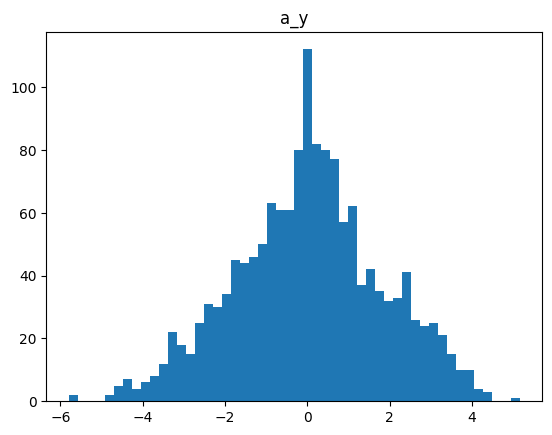

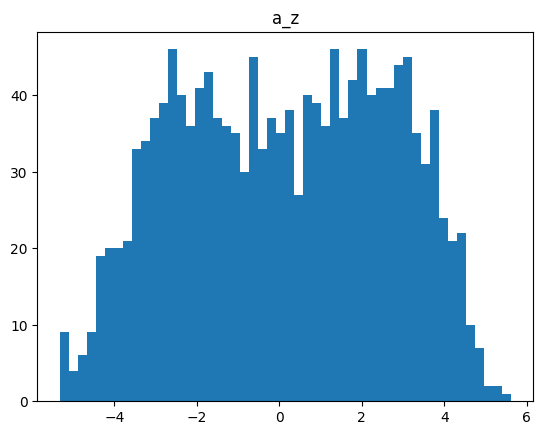

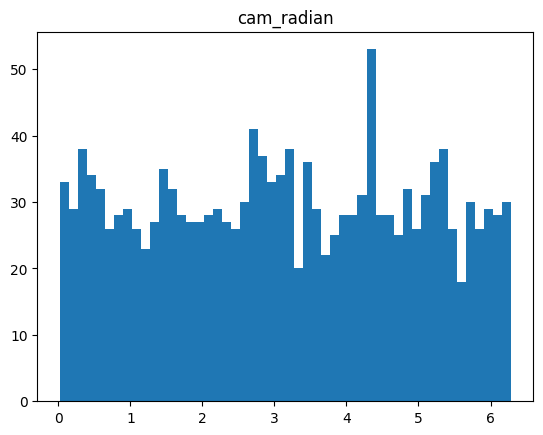

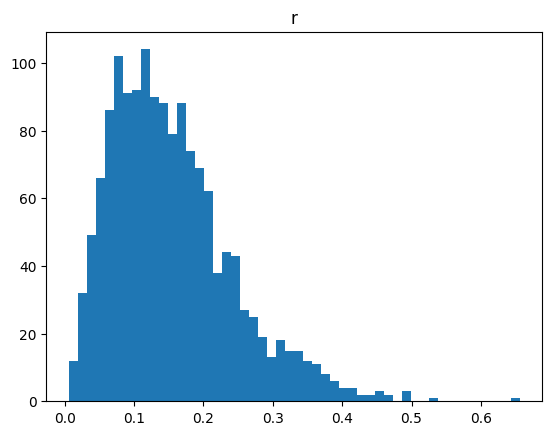

In [3]:
# plot histogram of each variable 
for key in data.keys():
    if (key != 'cam_radian') and (key != 'cam_angles'):
        plt.hist(data[key], bins=50)
        plt.title(key)
        plt.show()
    else:
        concatenated = np.concatenate(data[key])
        plt.hist(concatenated, bins=50)
        plt.title(key)
        plt.show()

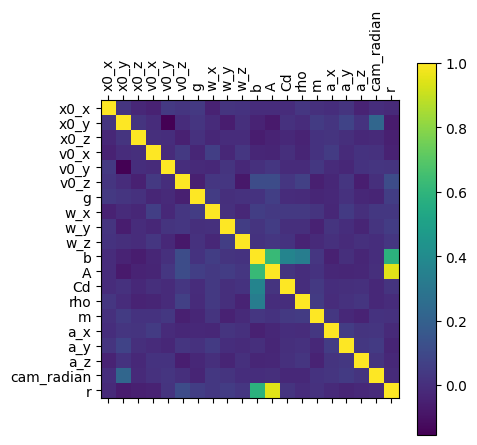

In [11]:
l = data['cam_radian']

#reshape l
l = np.array(l).reshape(1500)
# make list out of the array entries
l = l.tolist()
#print(l)

# reassign in data
data['cam_radian'] = l

#drop cams and traj column
data.pop('cams')
data.pop('traj')


# plot correlation matrix
import pandas as pd
df = pd.DataFrame(data)
plt.matshow(df.corr())
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.colorbar()
plt.show()


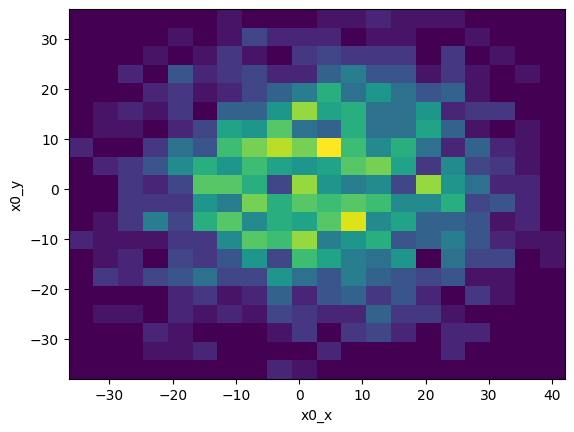

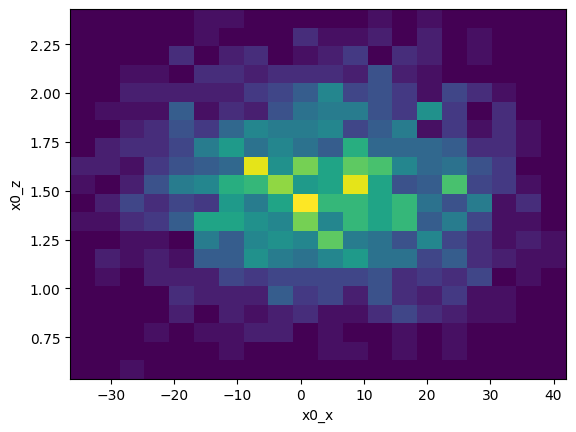

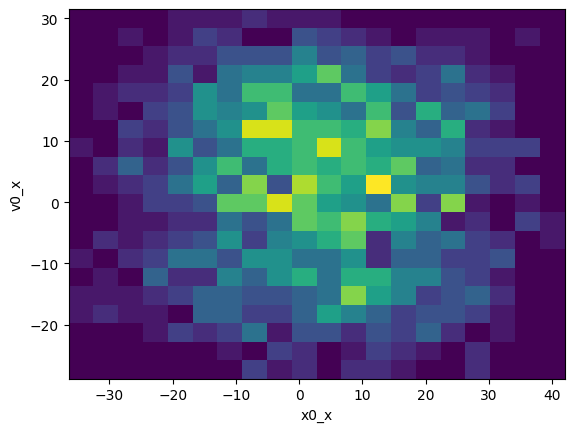

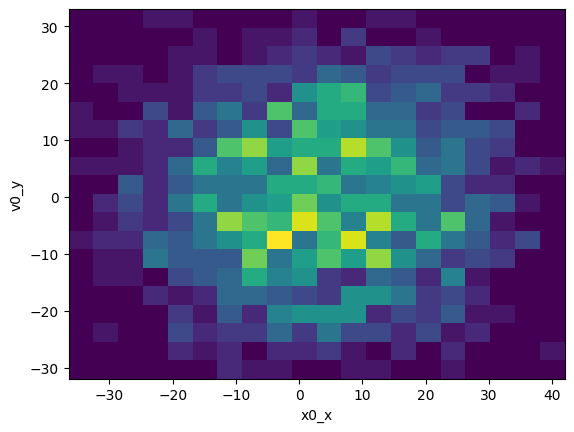

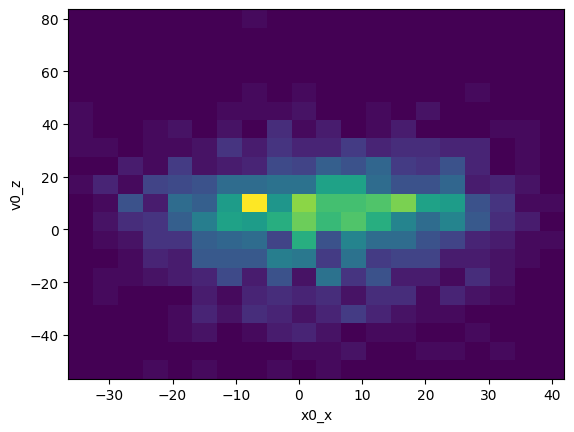

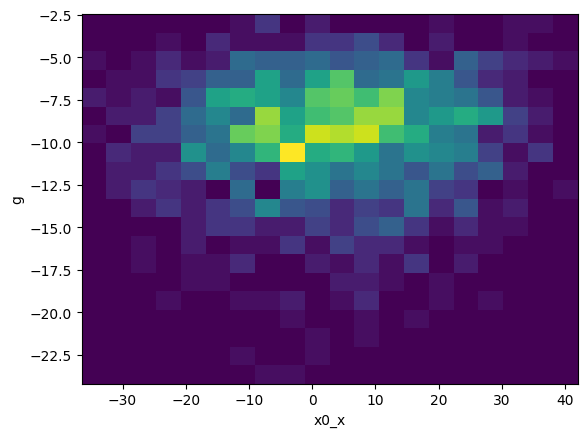

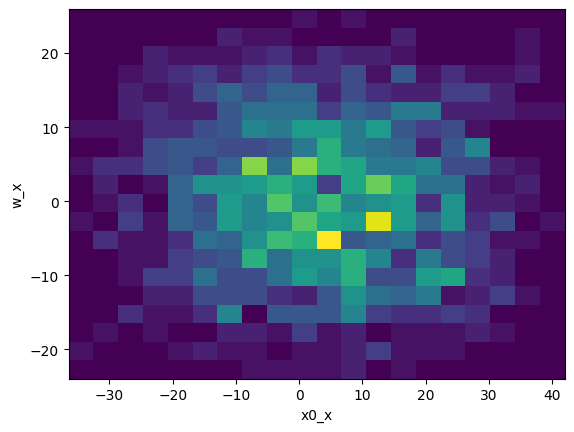

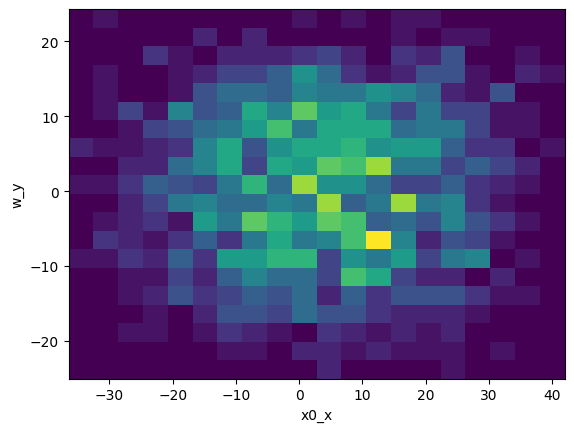

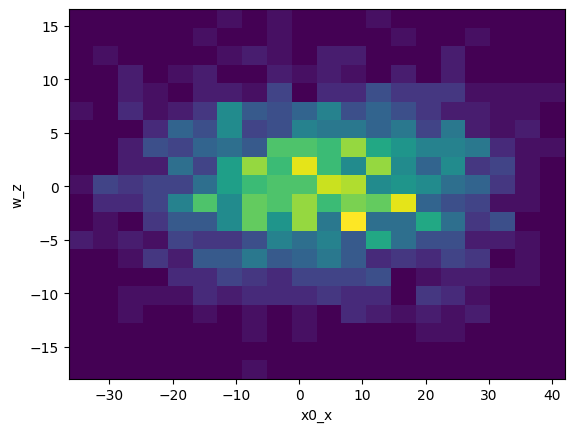

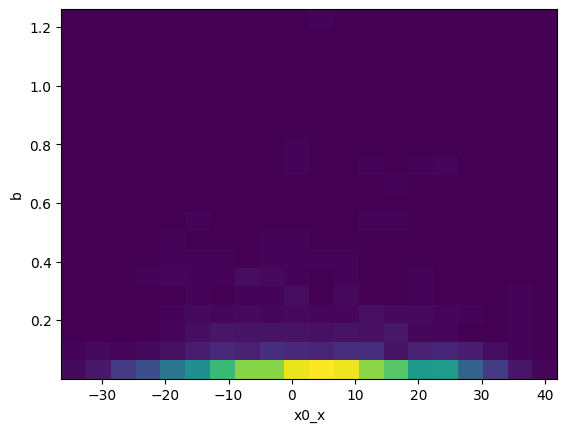

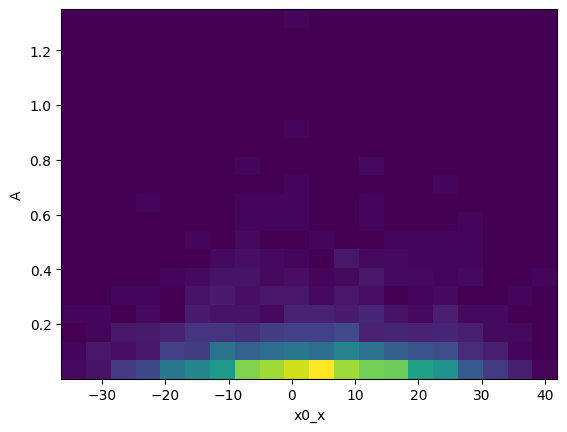

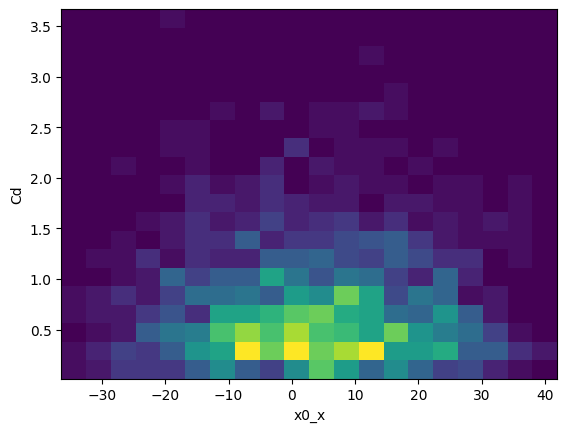

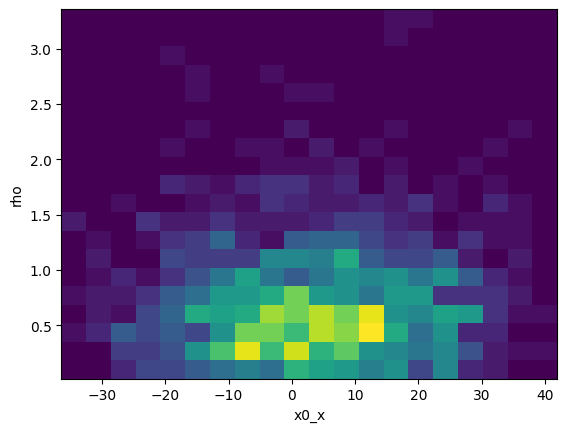

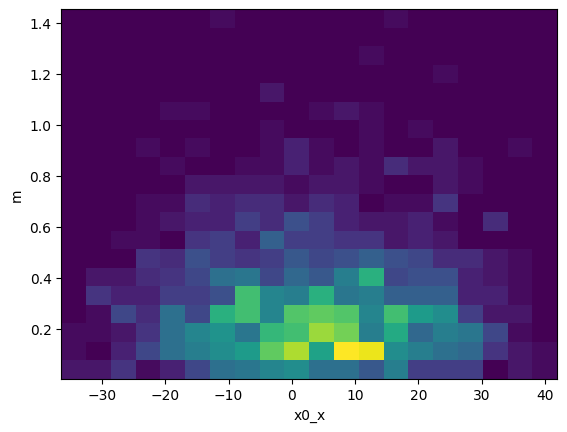

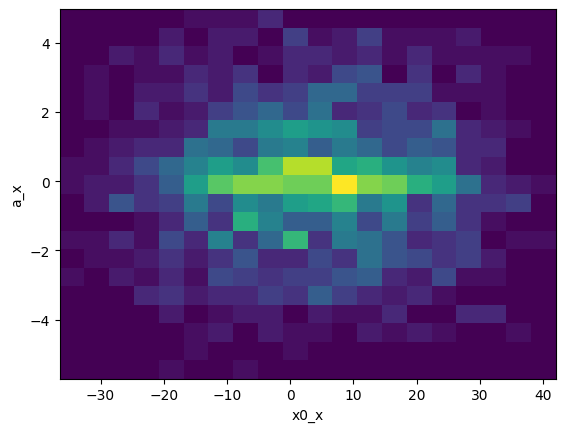

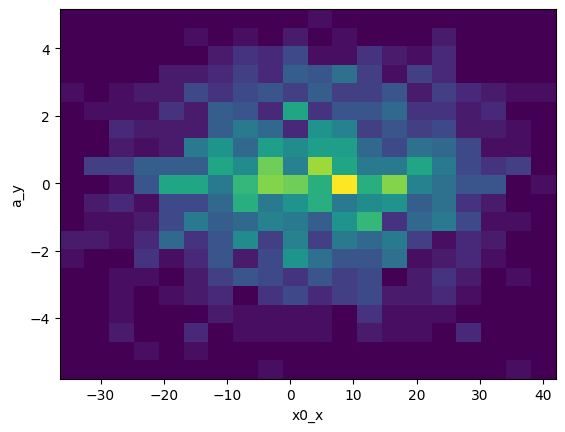

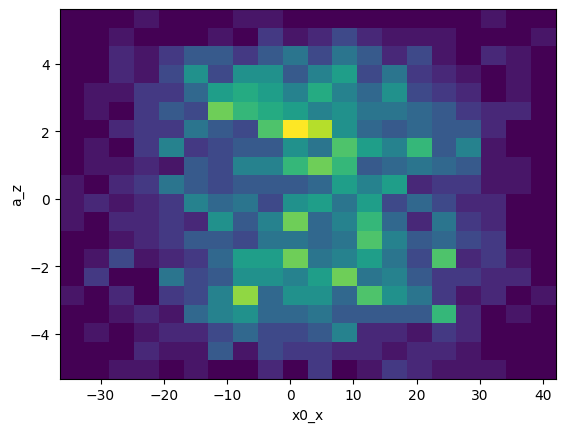

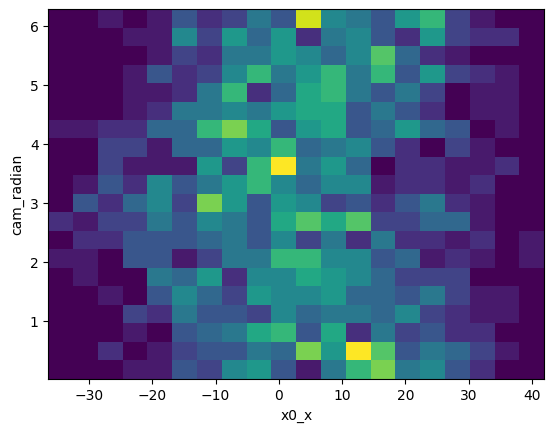

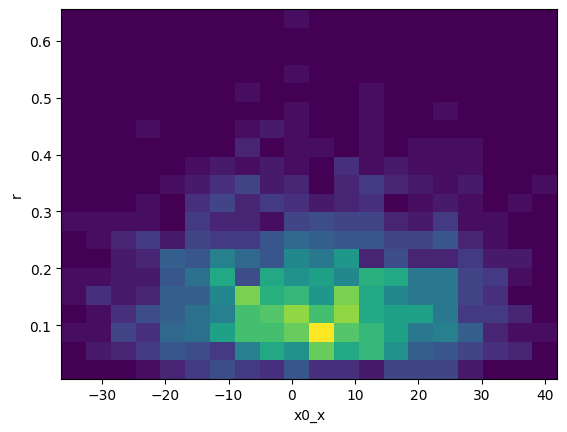

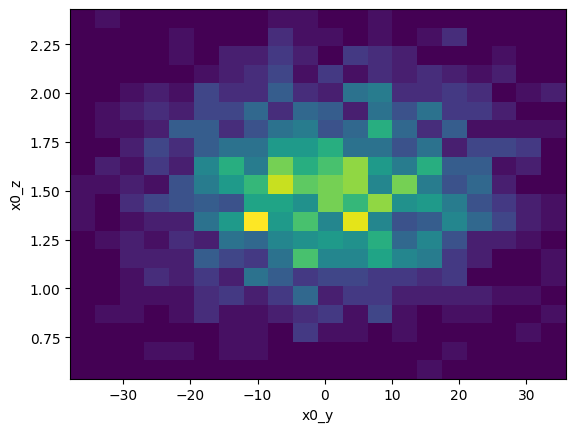

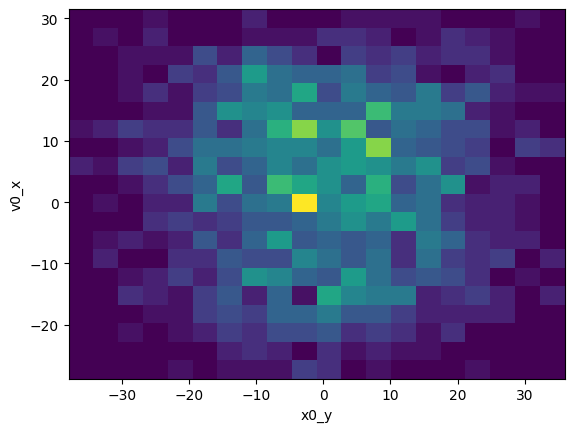

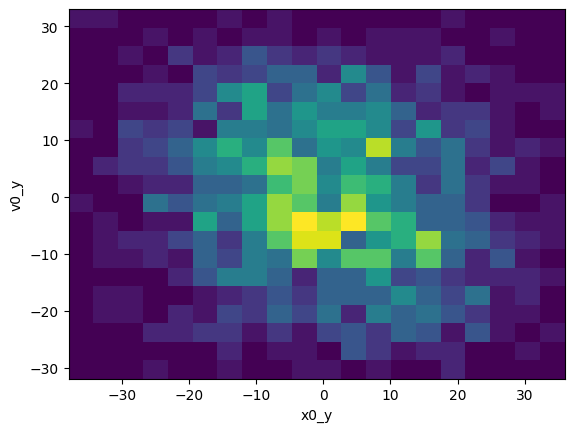

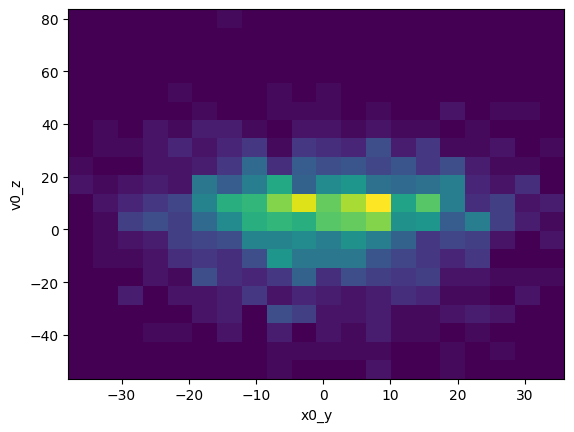

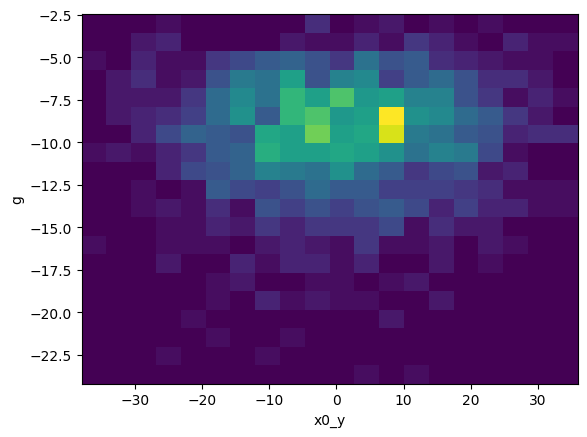

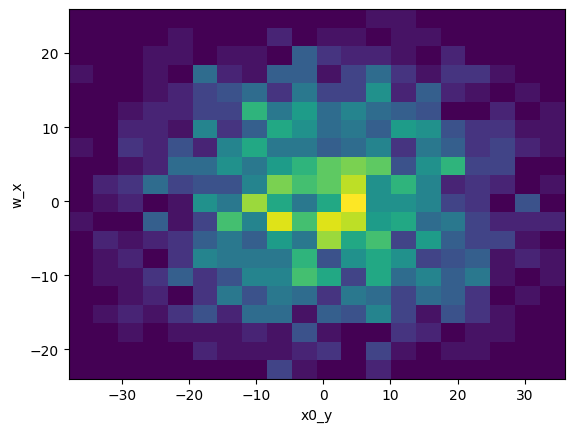

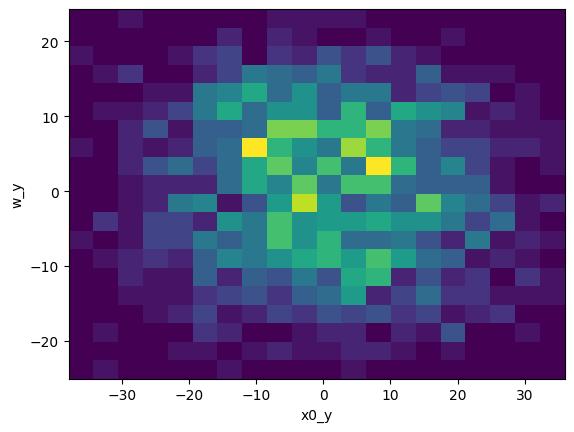

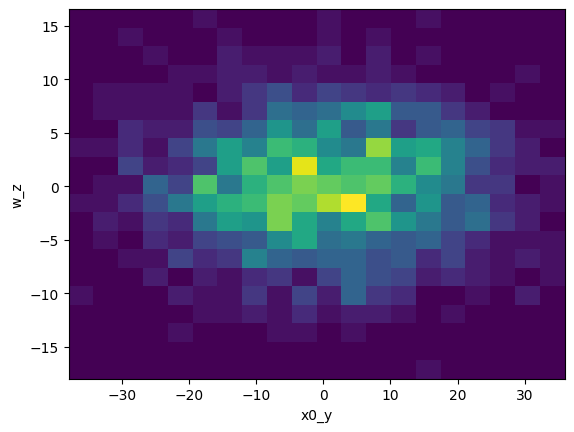

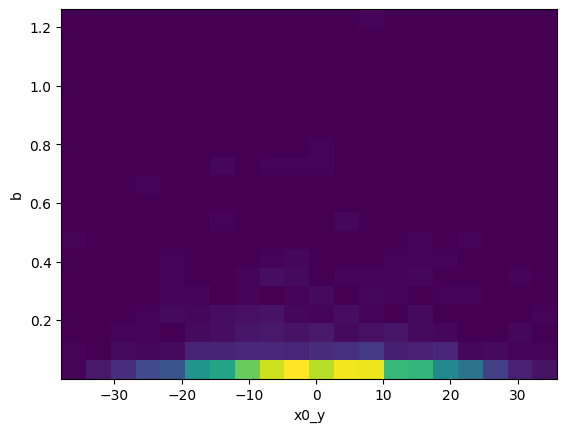

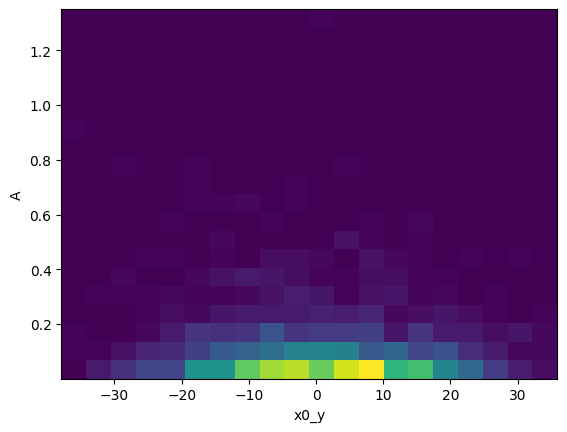

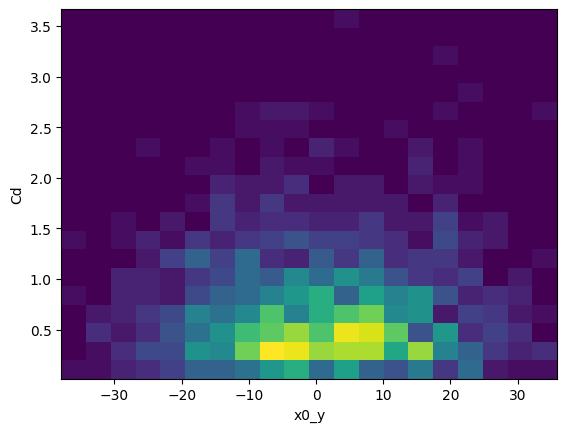

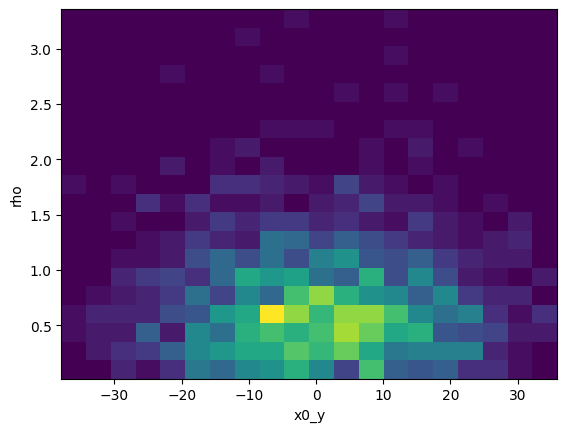

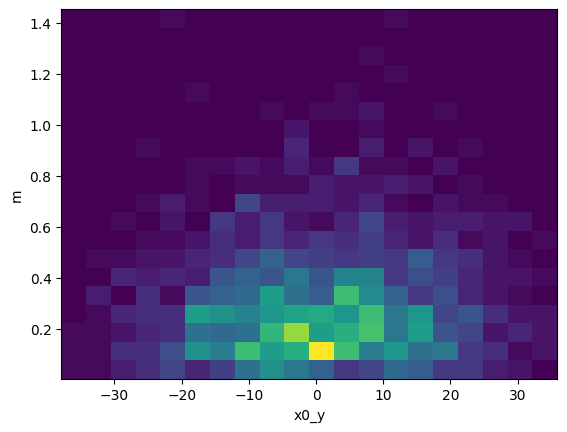

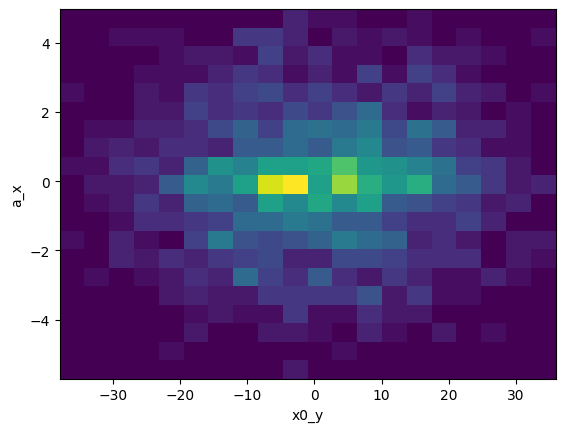

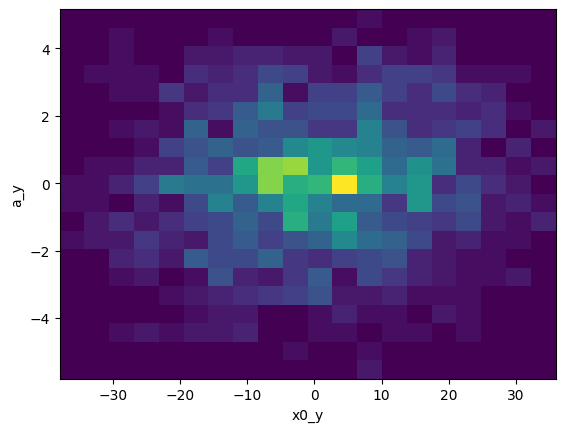

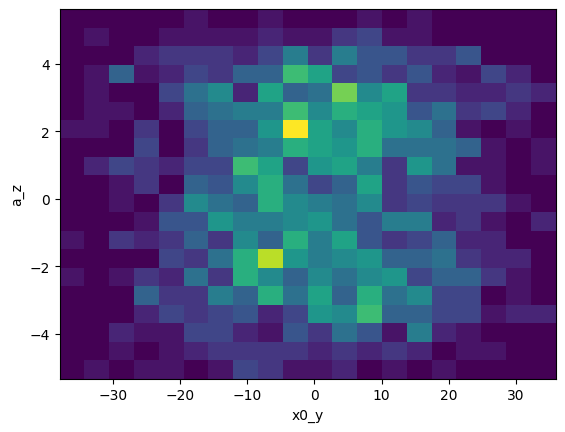

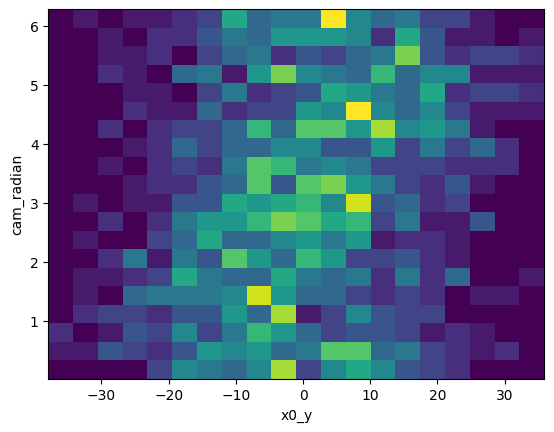

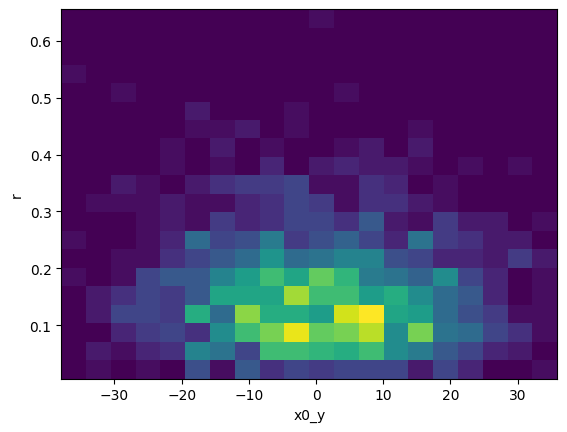

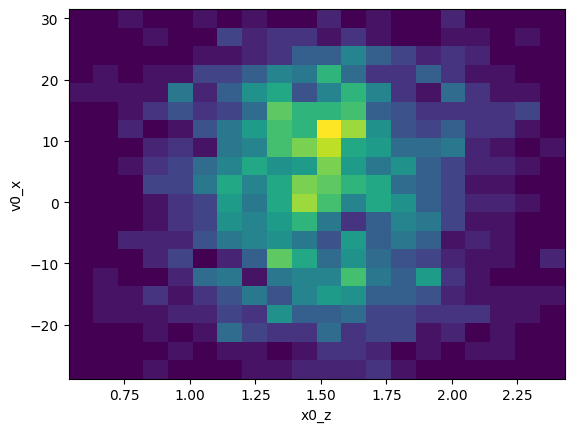

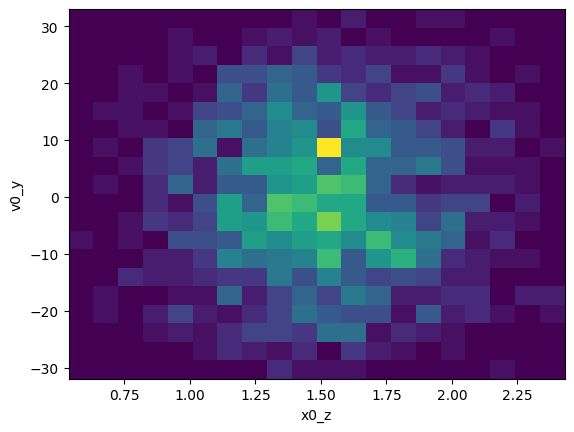

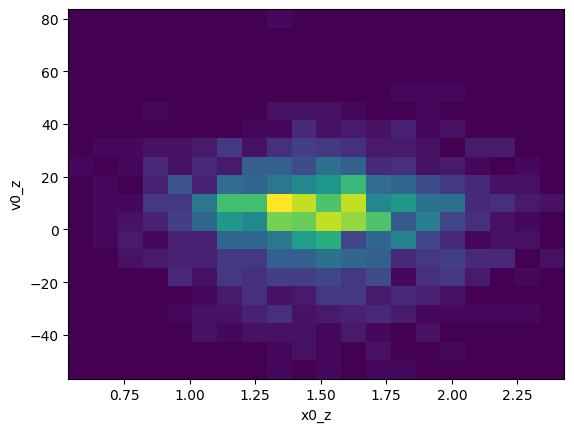

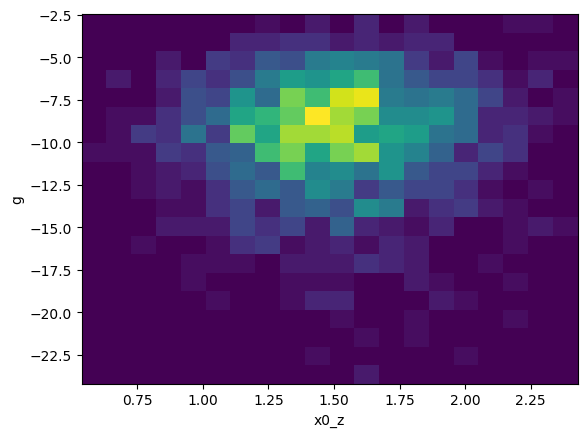

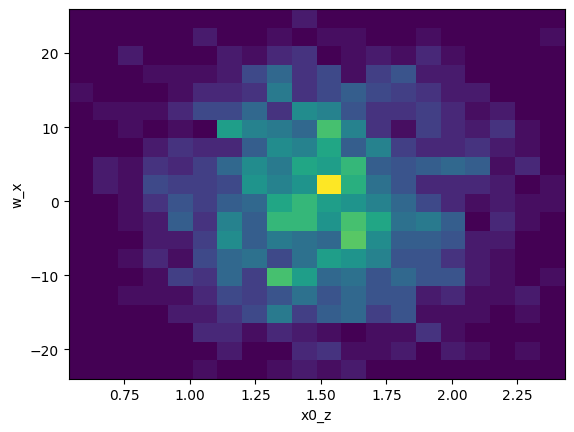

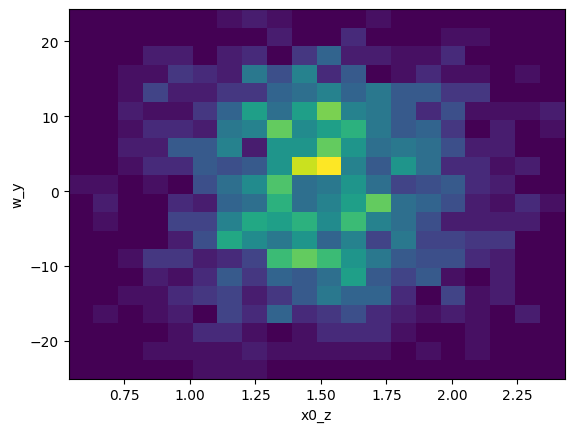

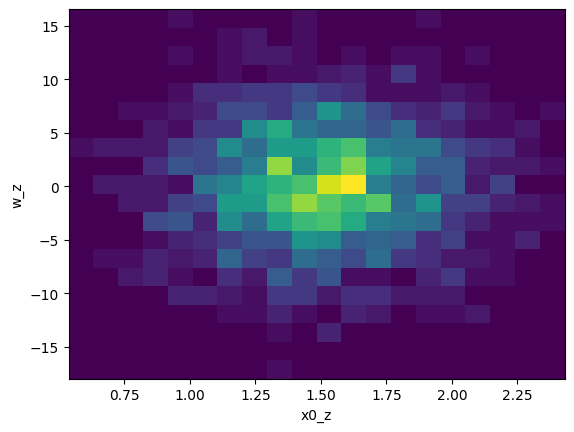

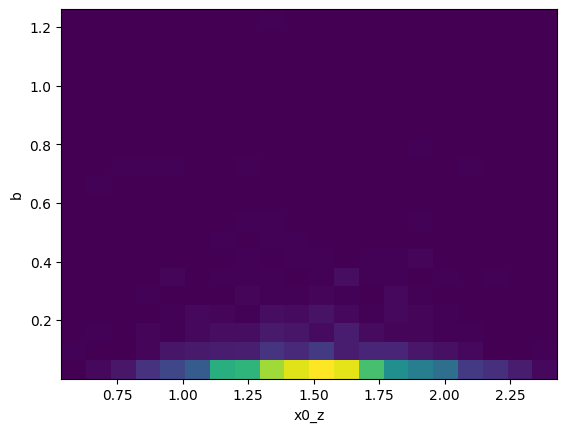

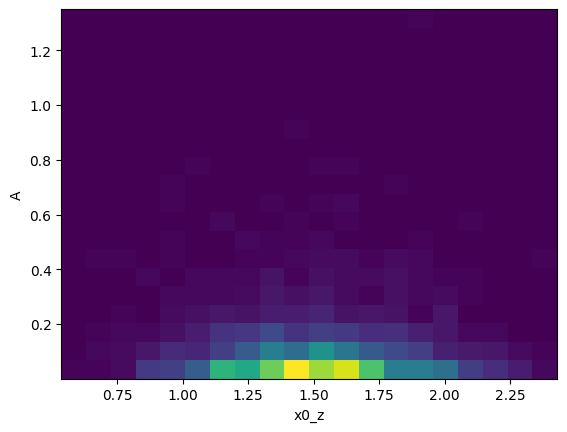

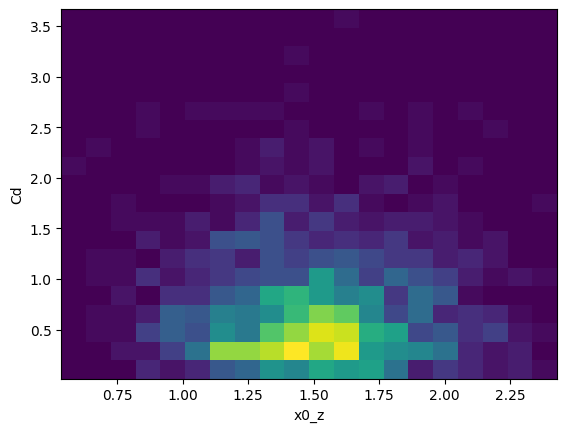

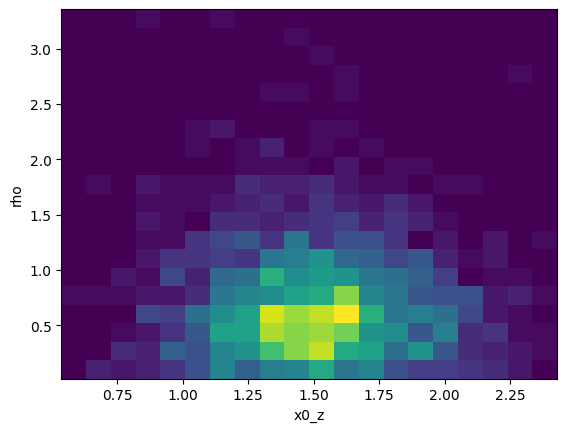

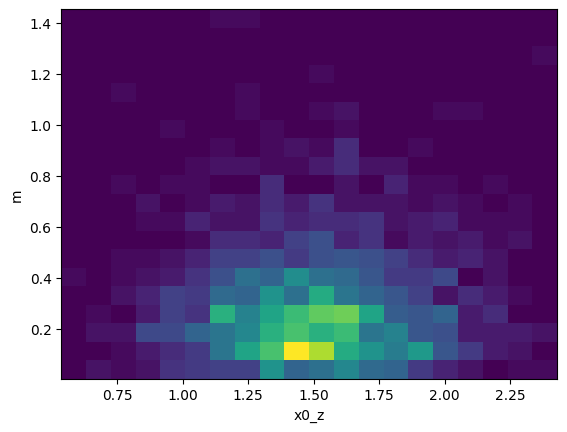

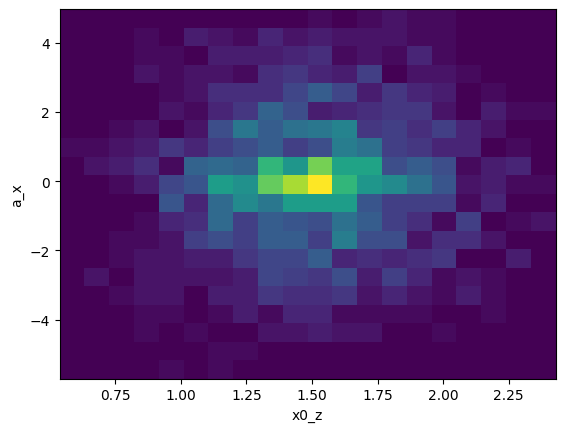

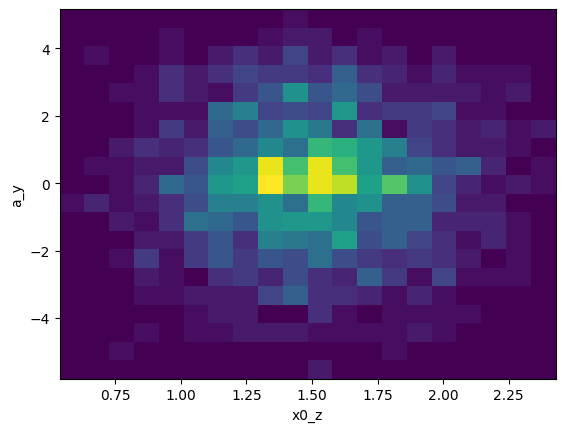

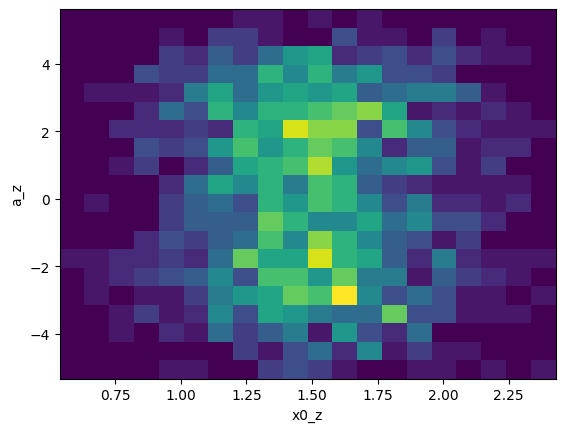

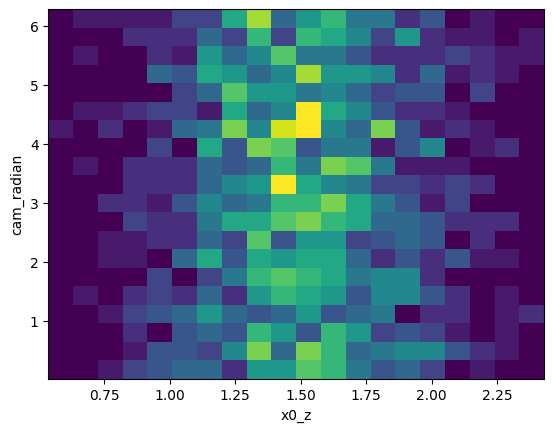

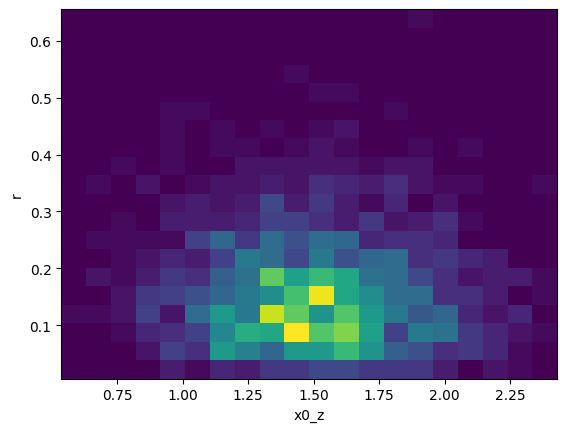

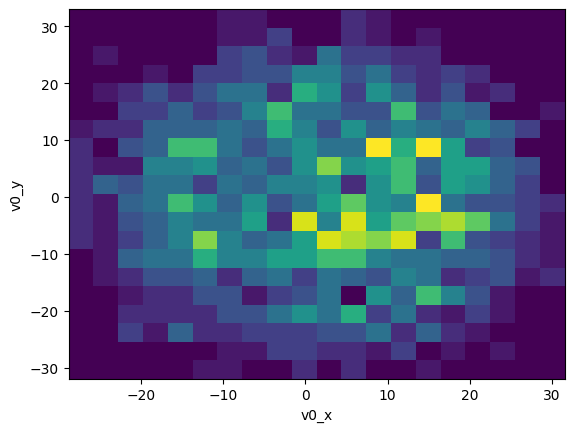

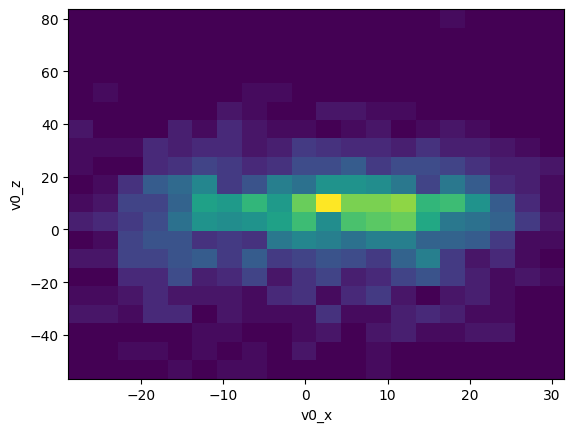

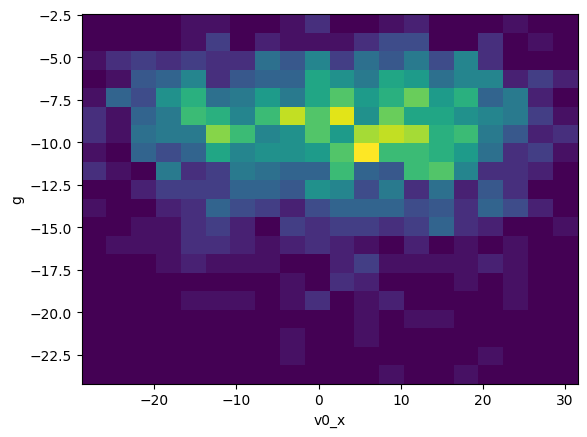

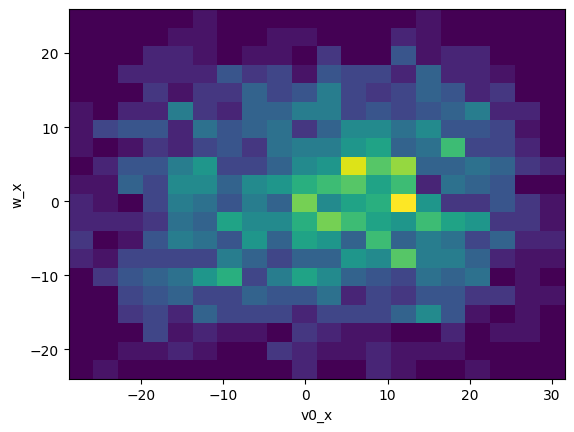

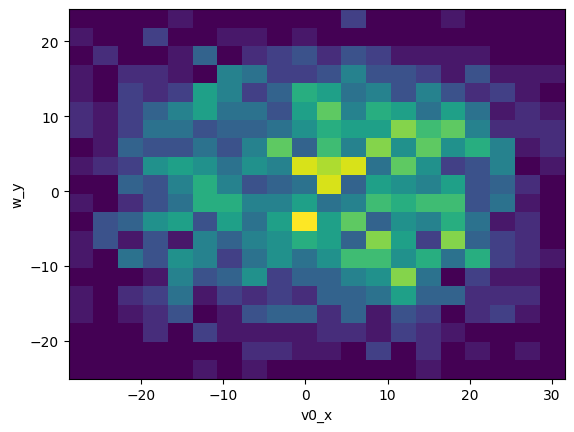

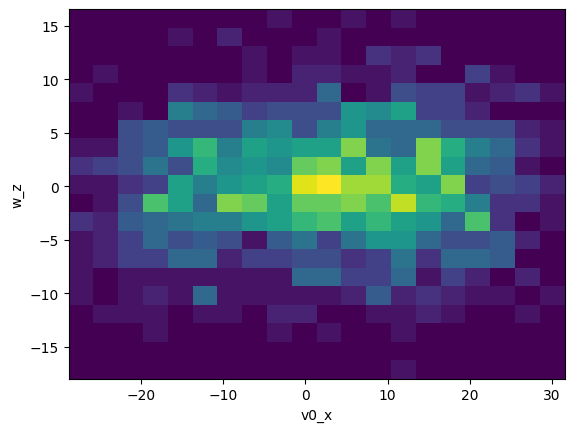

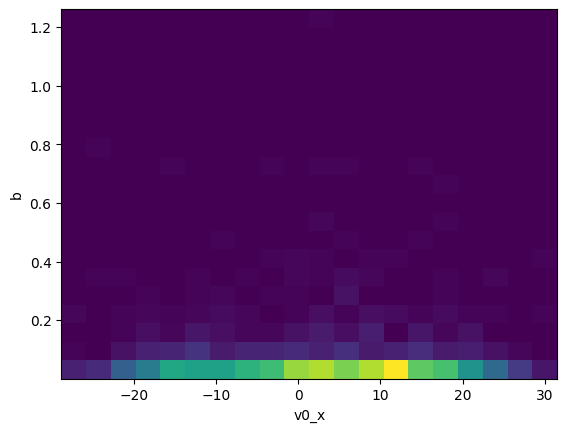

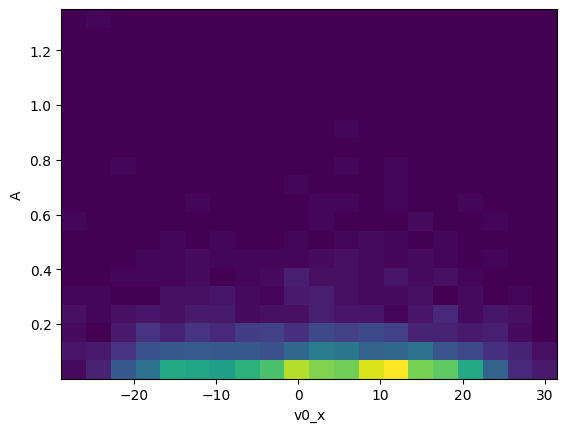

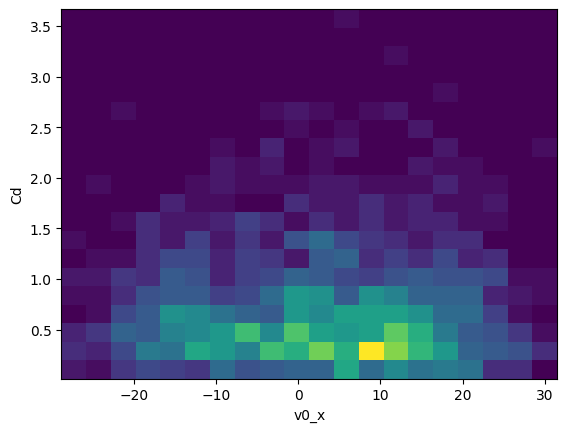

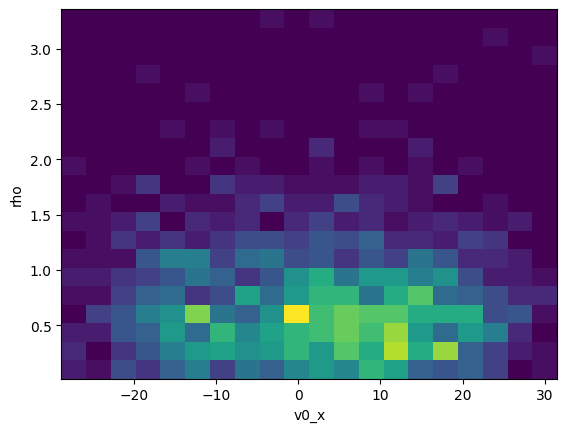

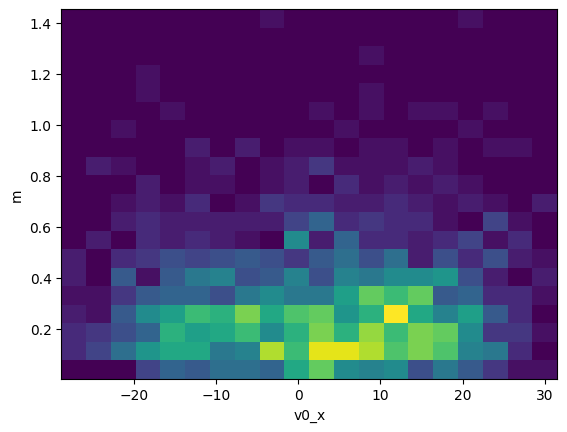

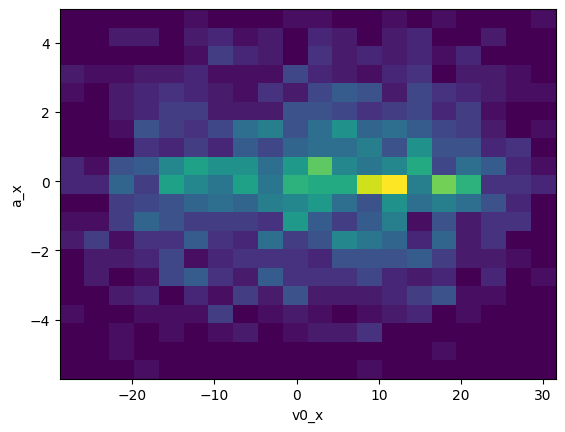

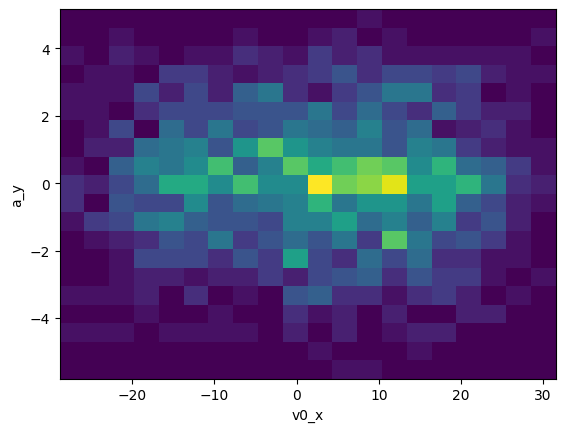

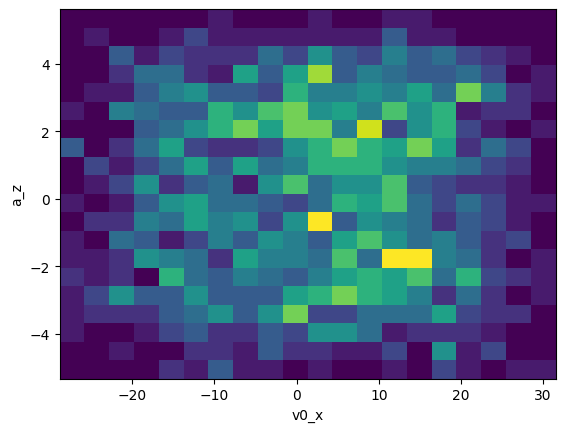

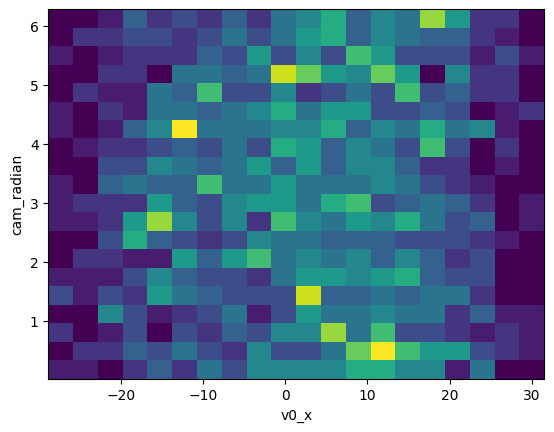

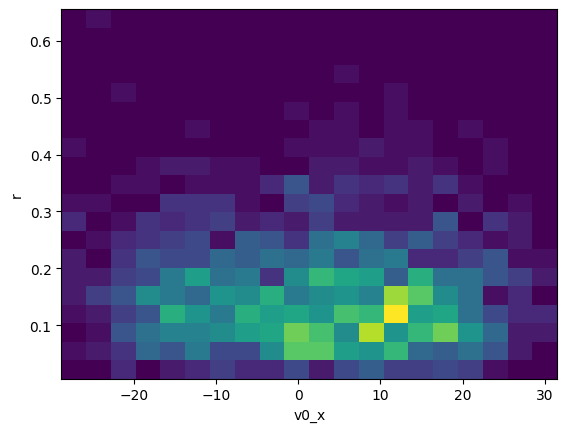

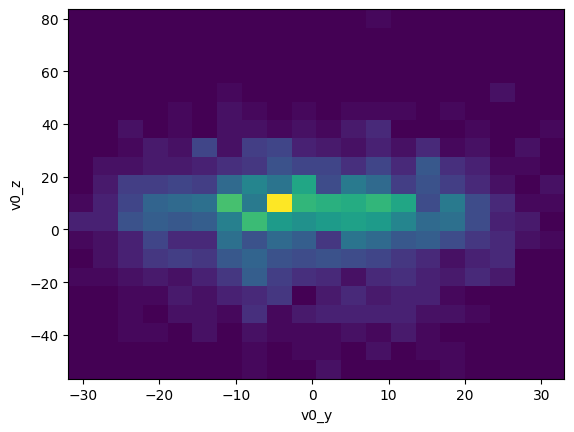

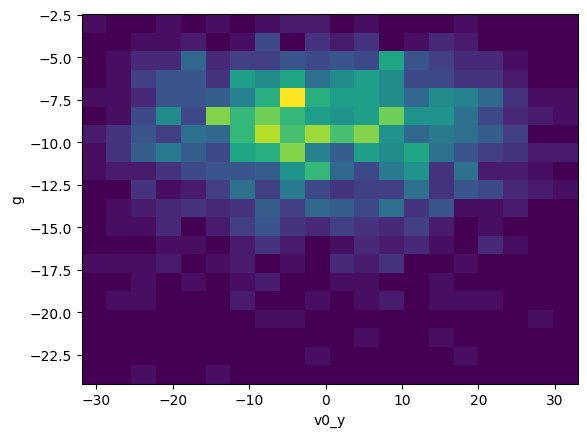

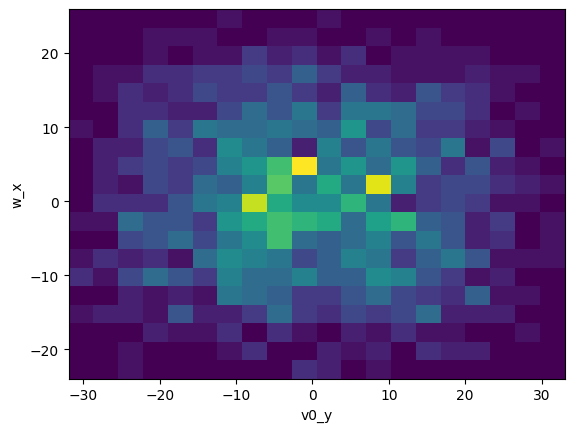

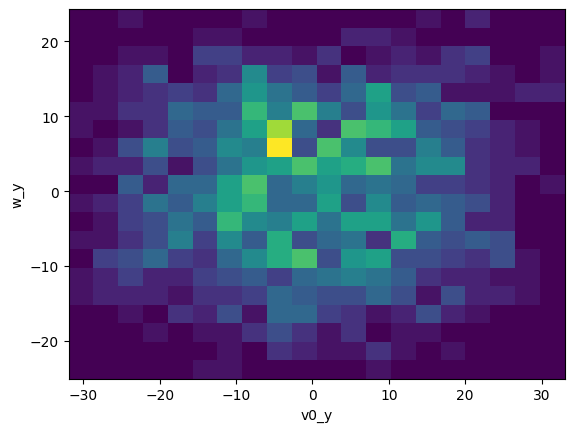

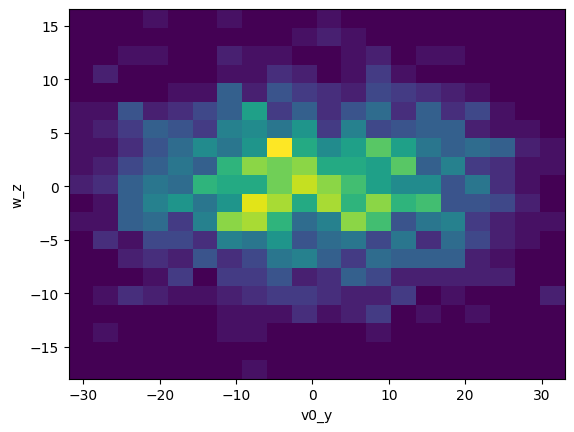

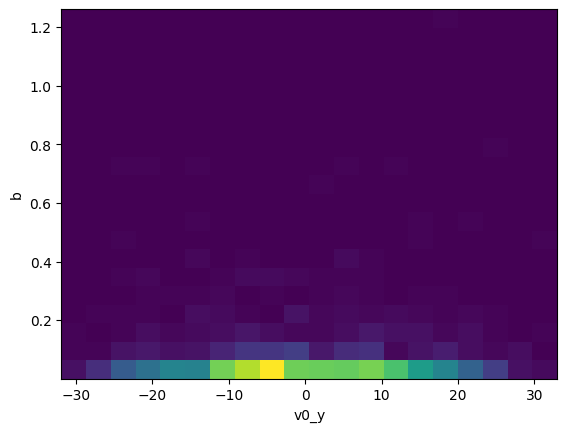

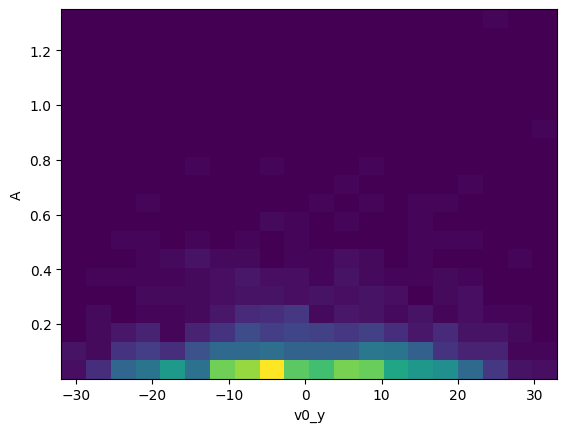

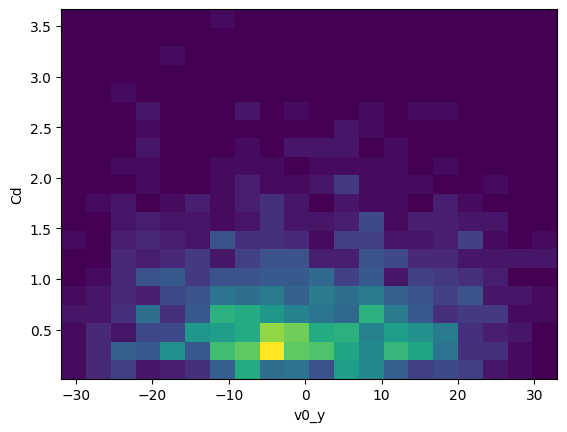

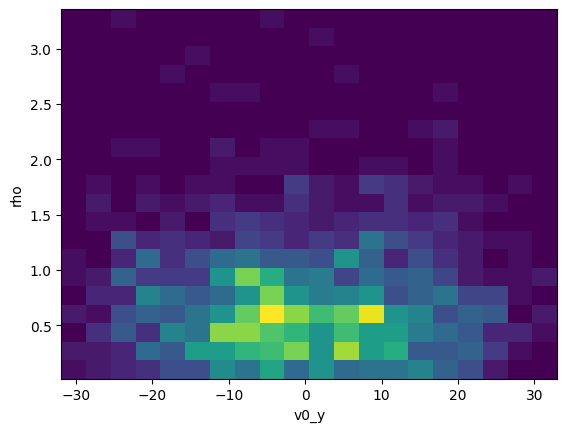

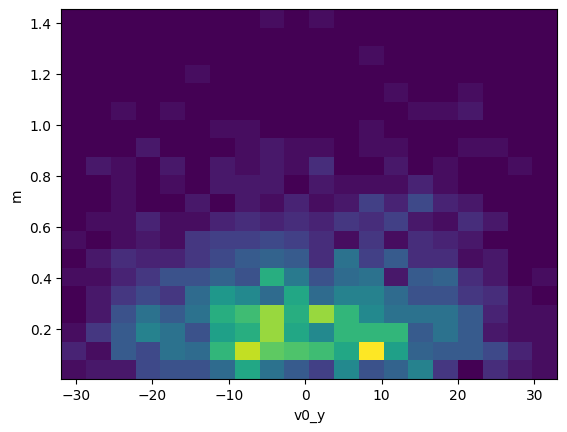

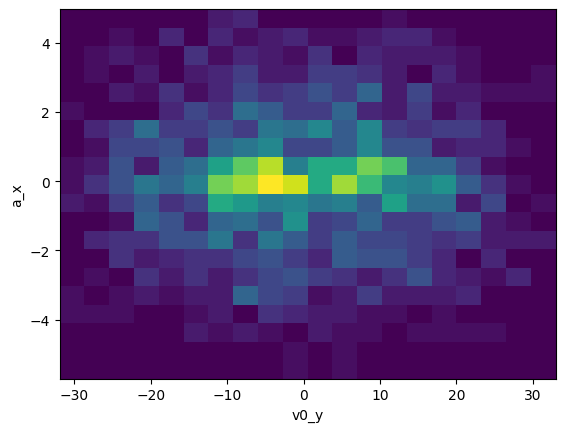

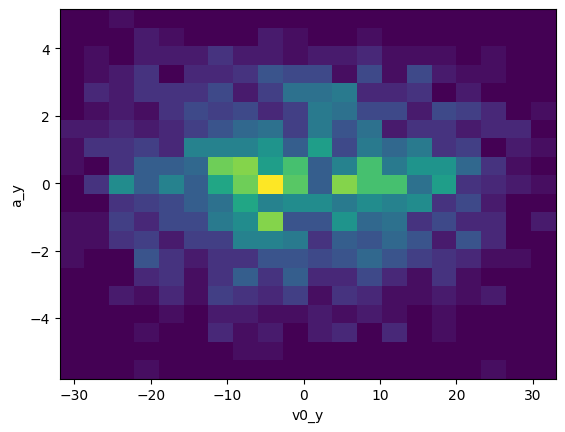

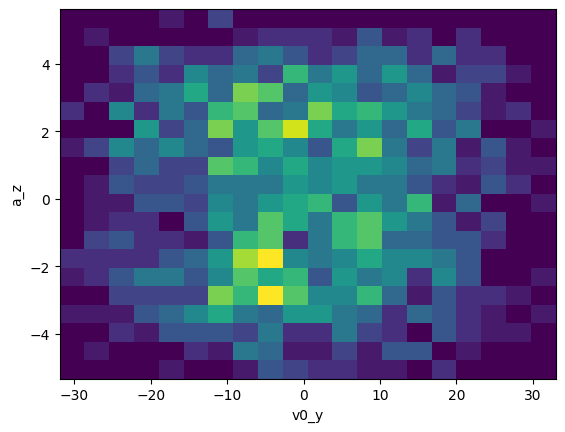

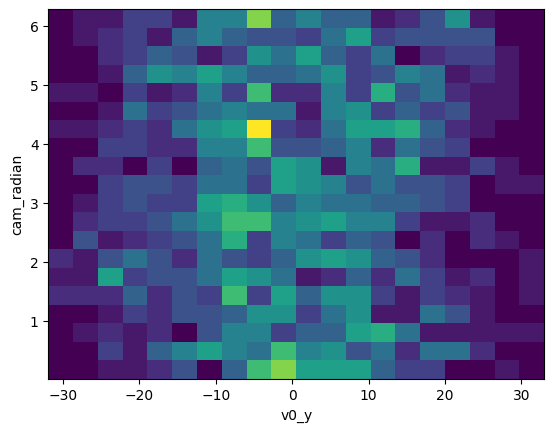

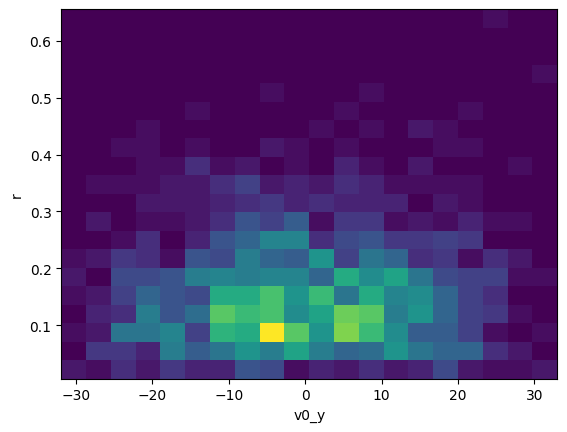

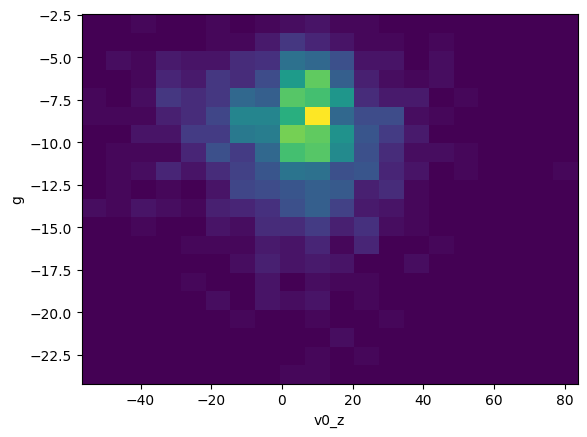

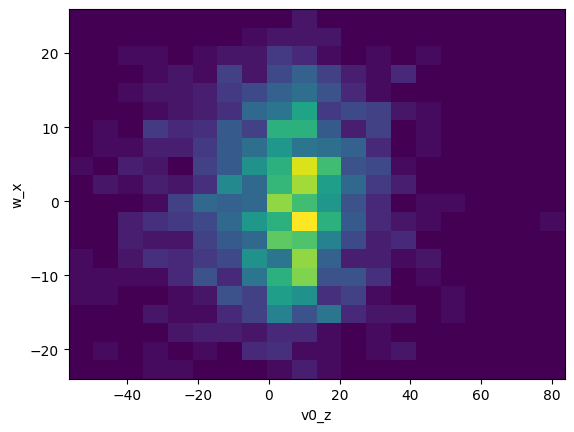

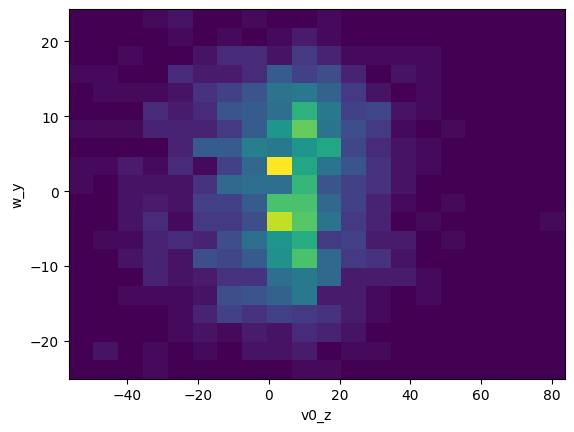

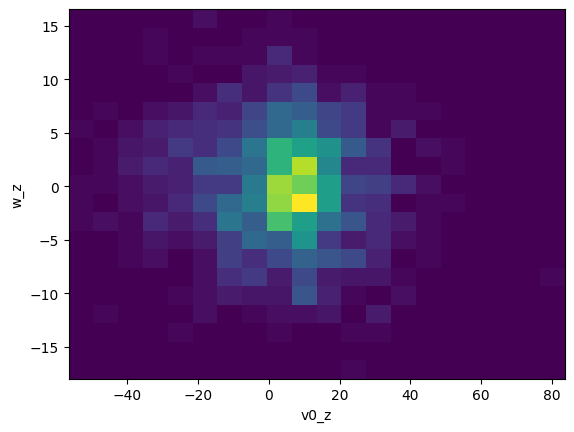

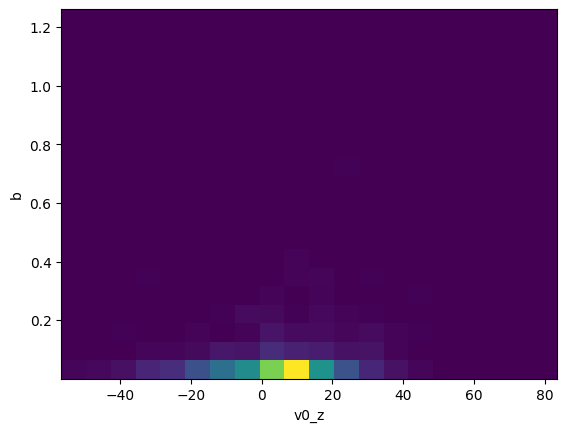

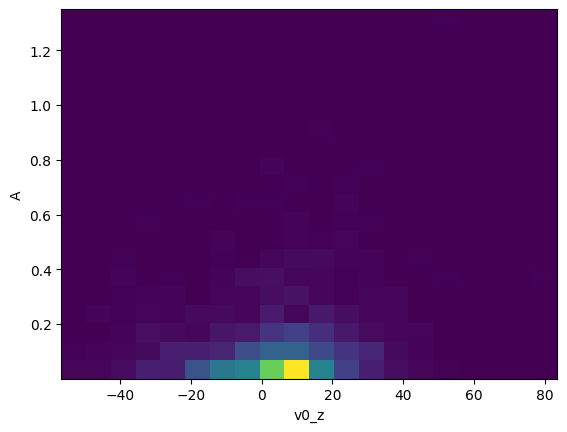

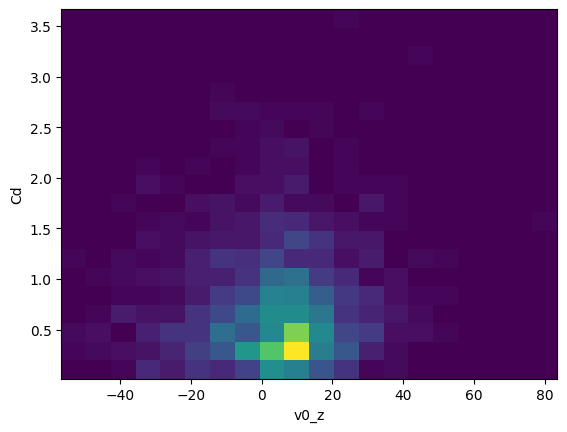

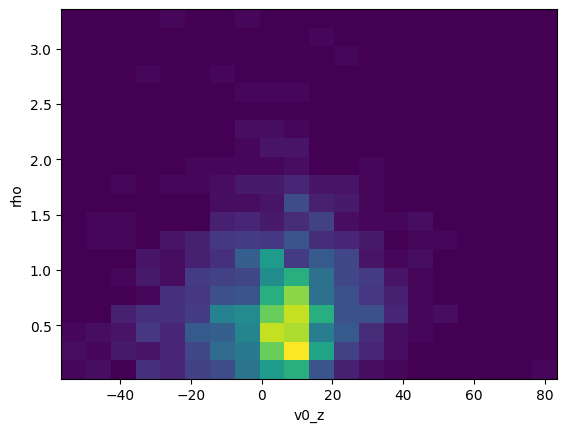

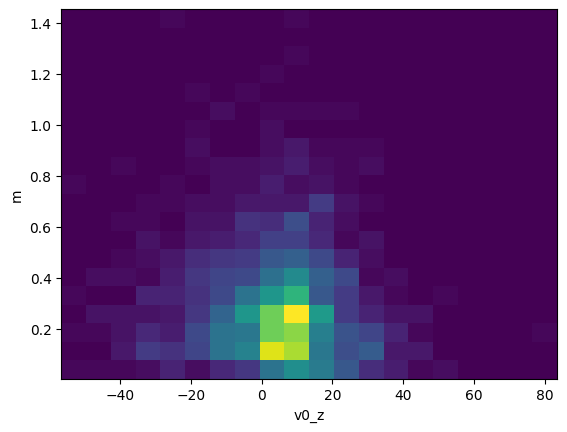

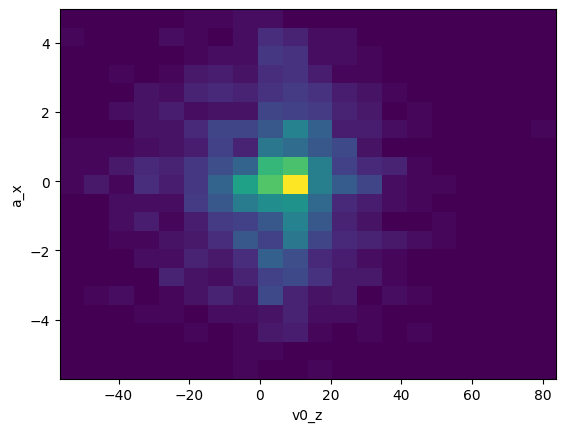

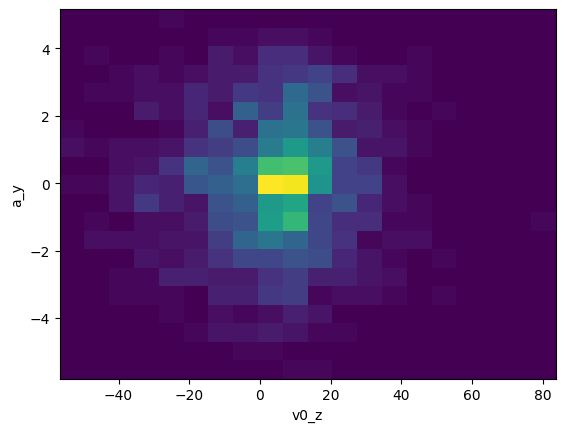

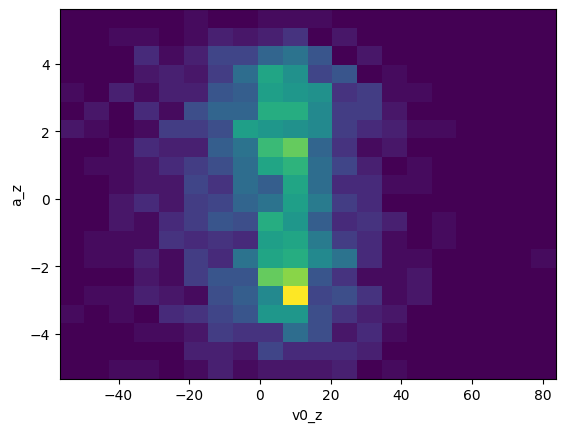

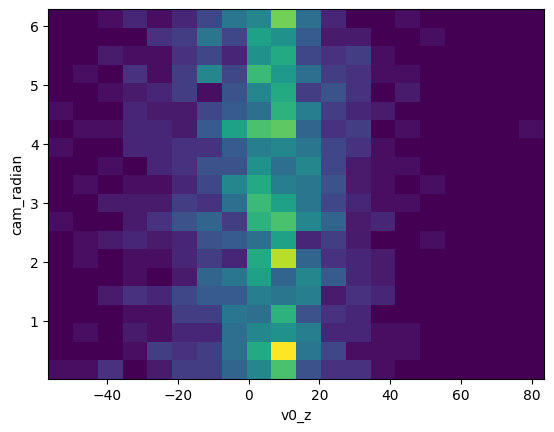

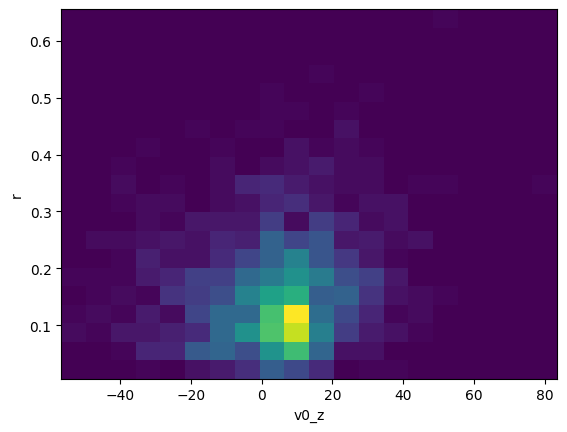

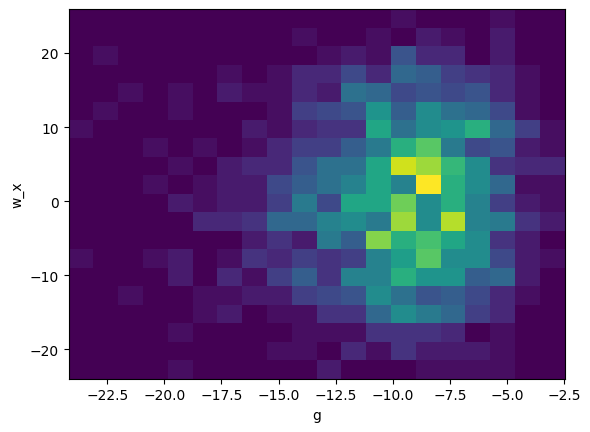

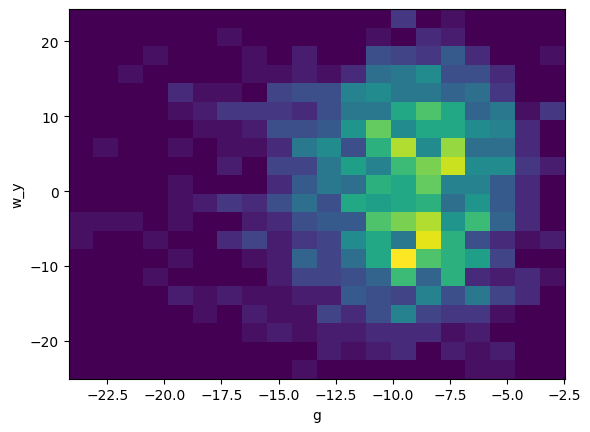

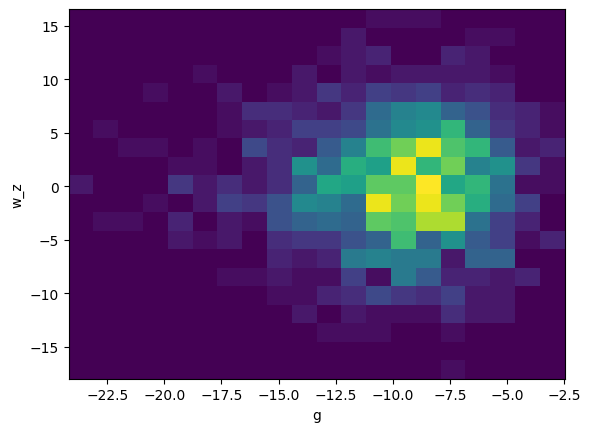

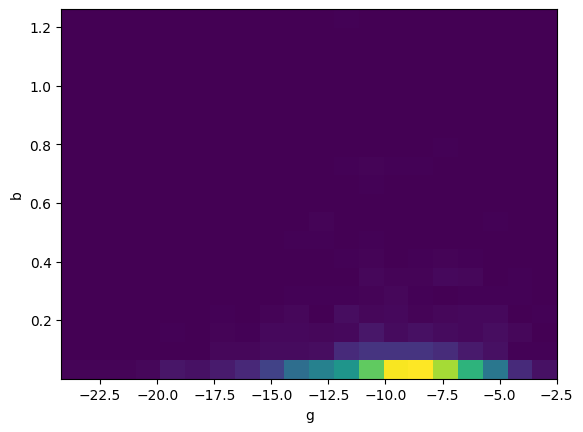

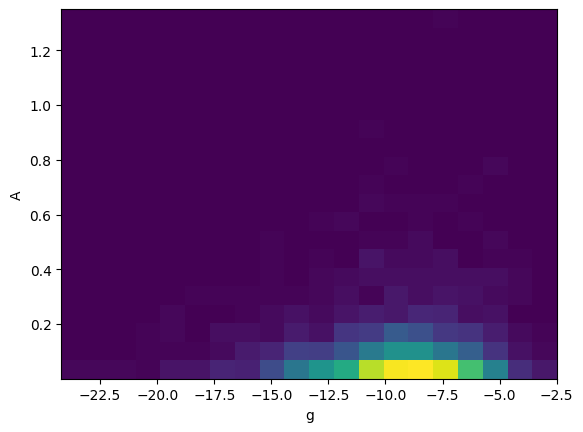

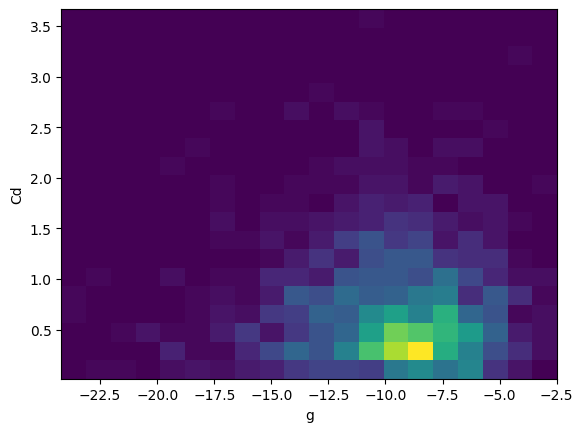

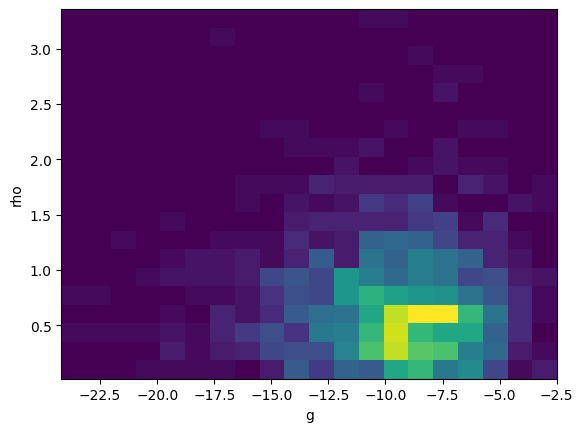

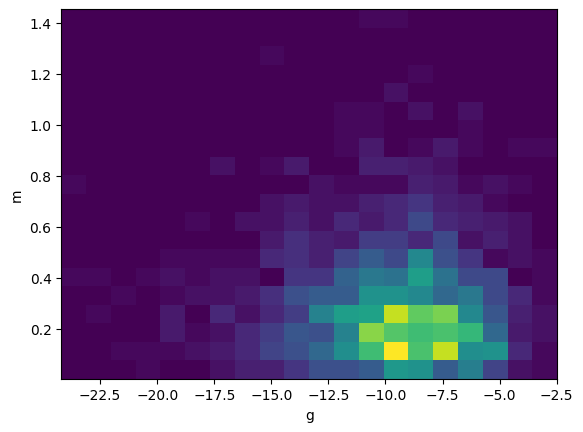

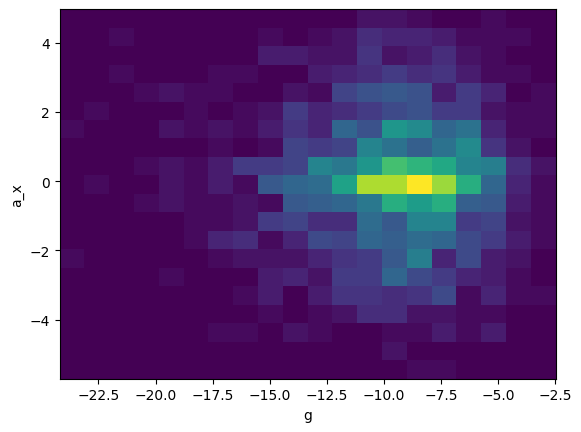

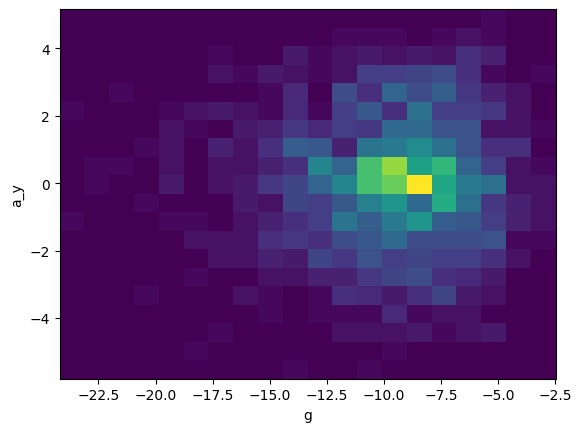

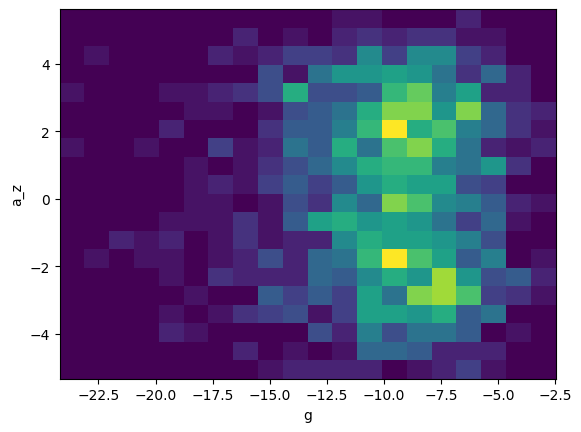

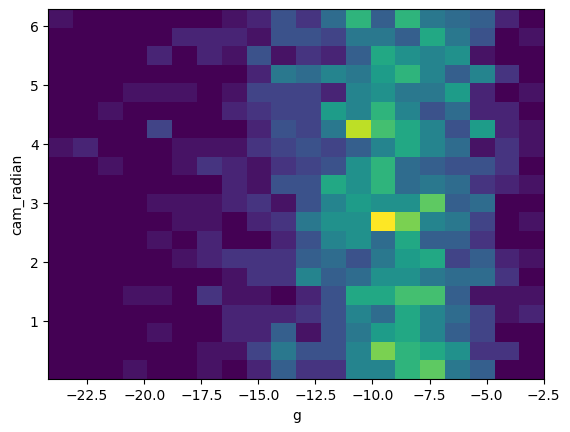

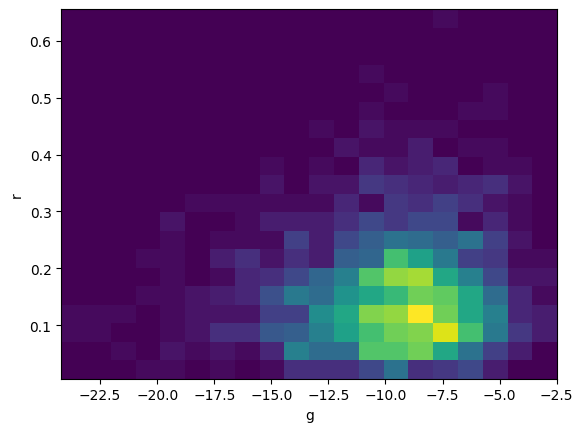

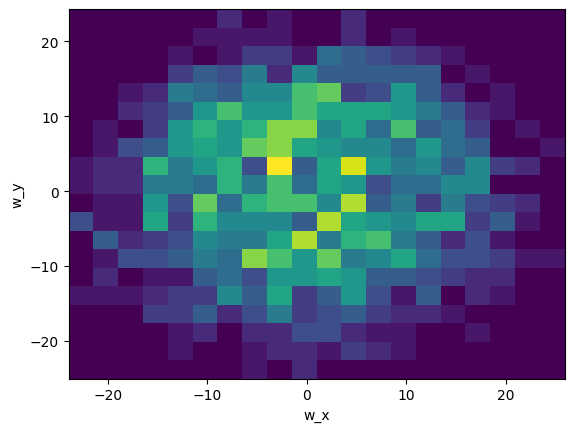

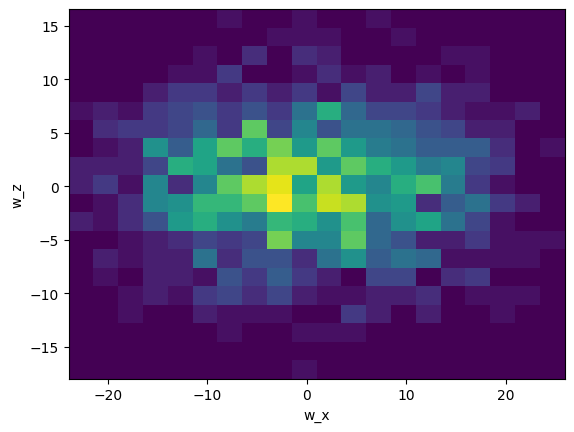

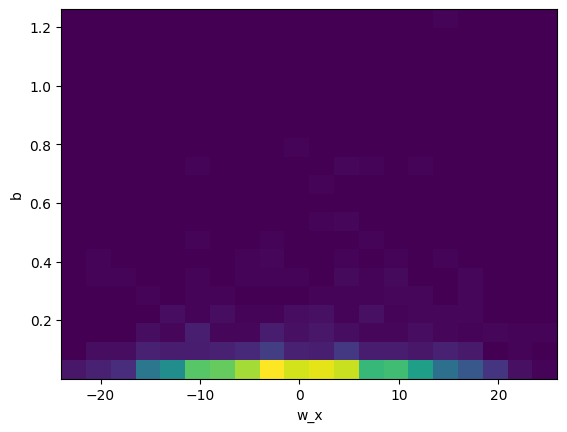

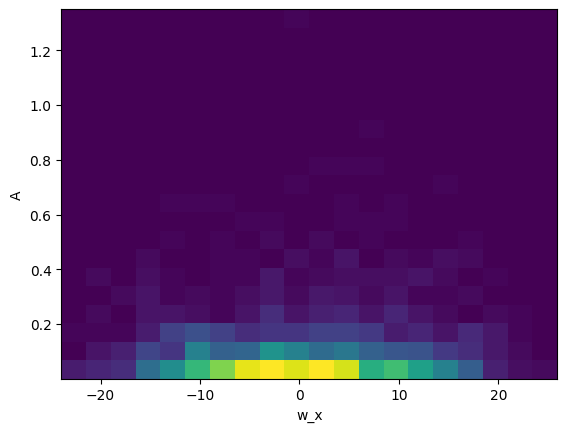

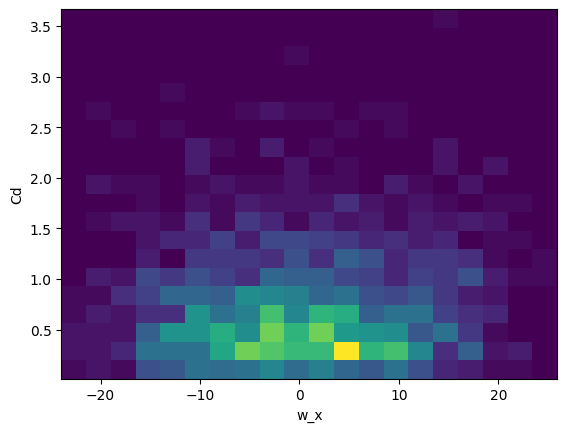

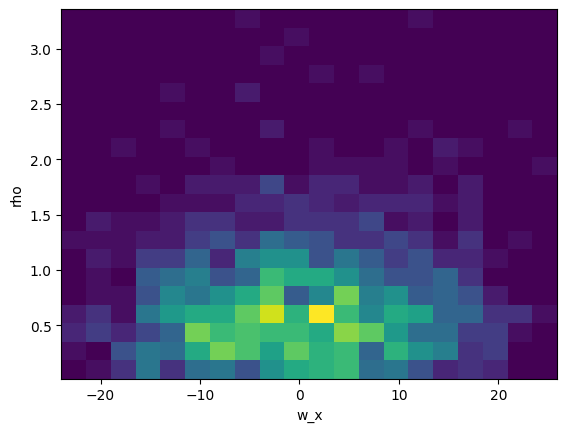

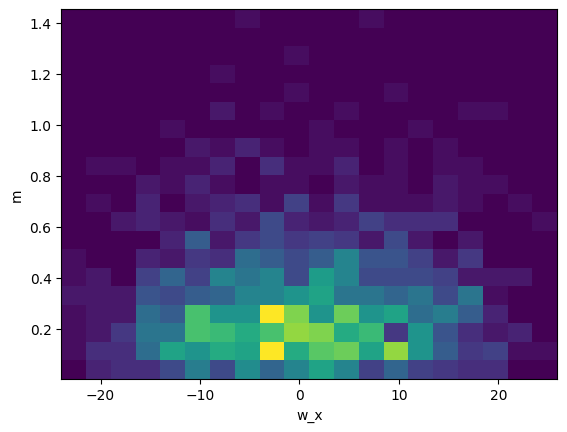

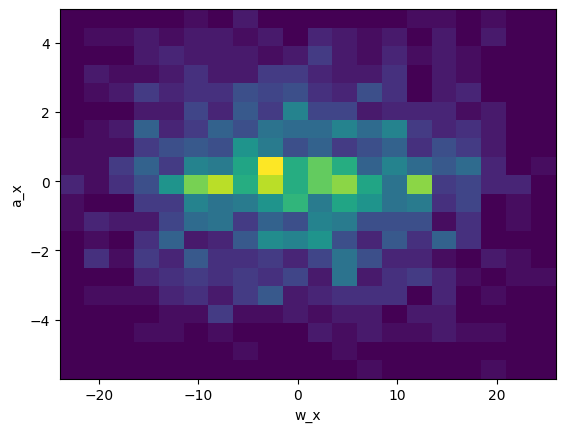

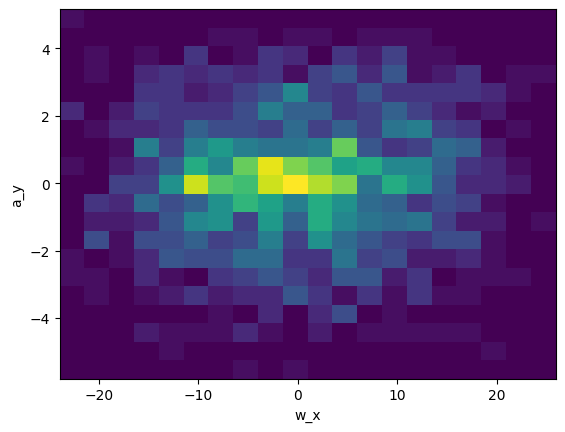

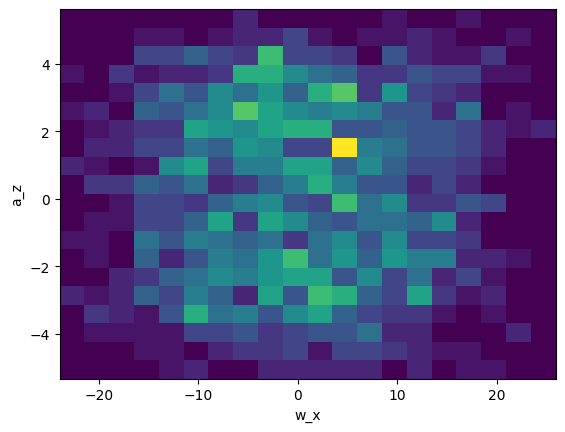

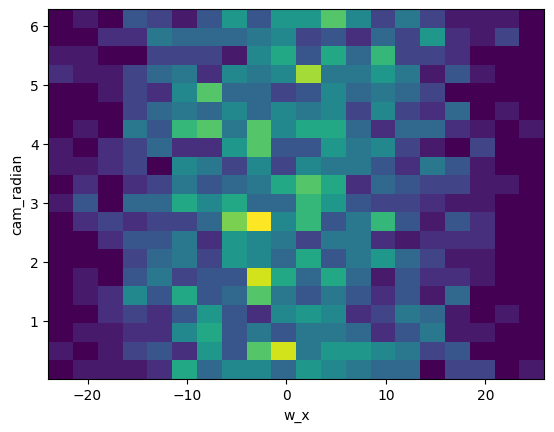

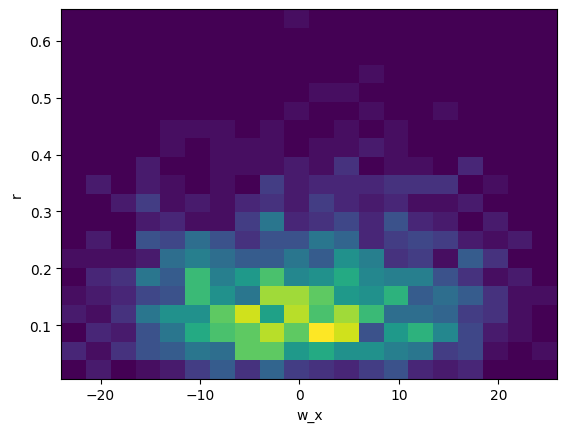

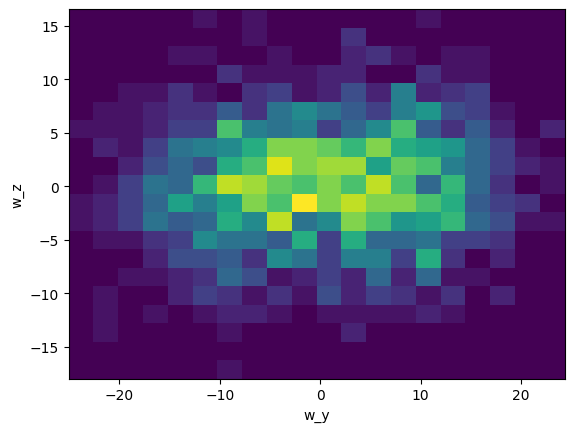

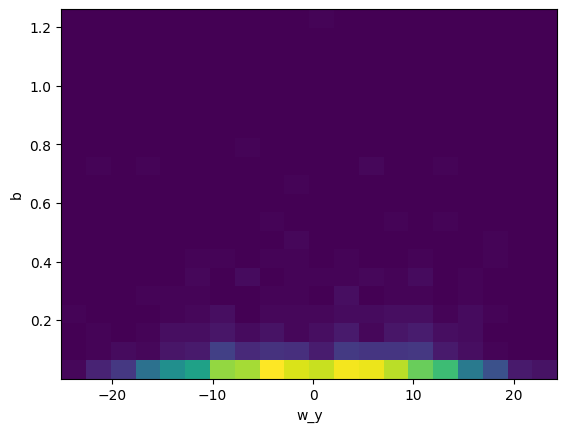

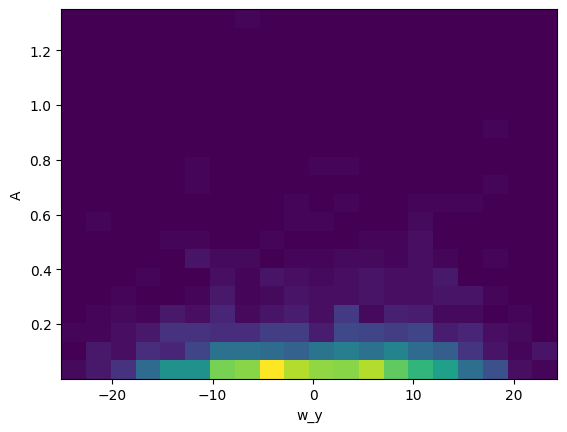

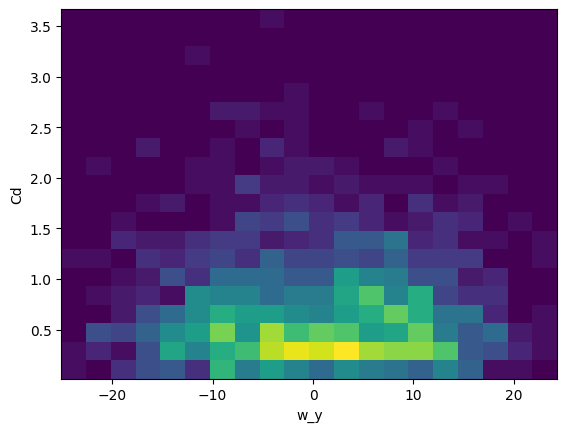

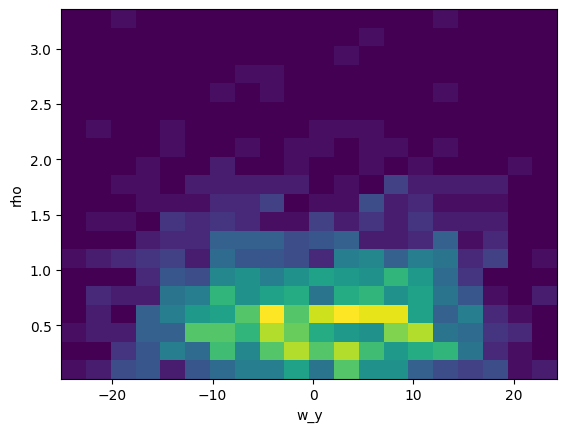

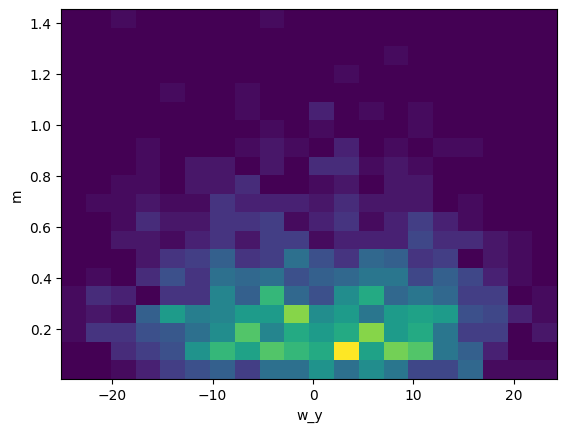

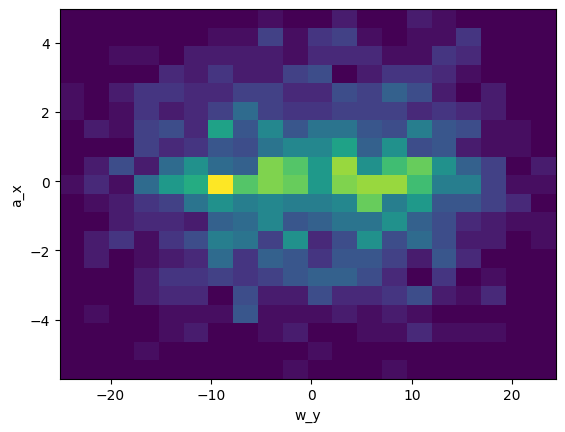

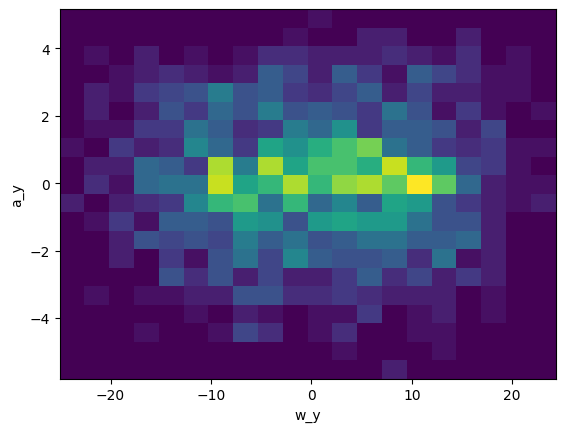

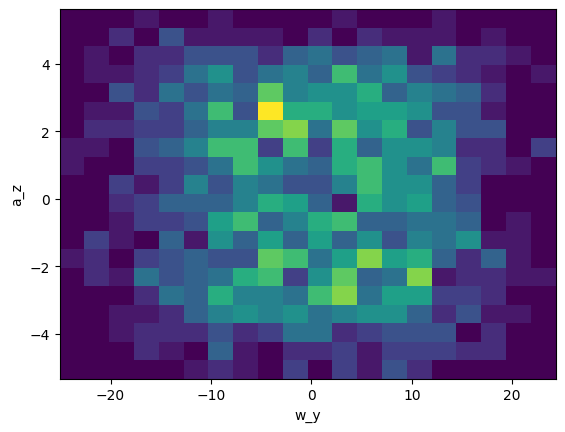

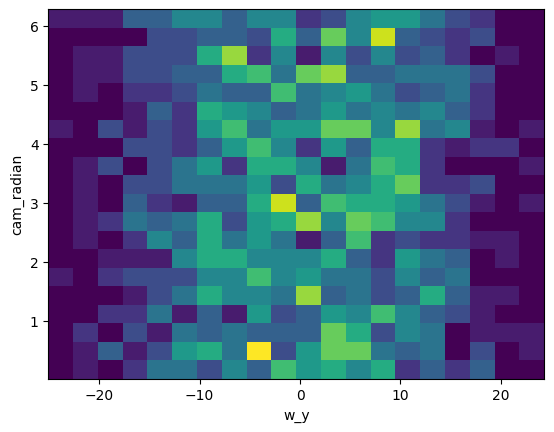

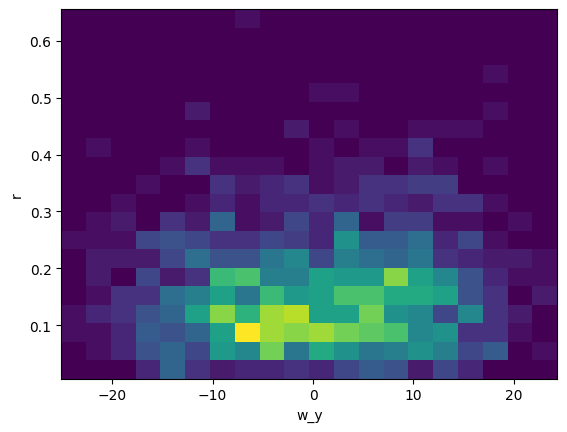

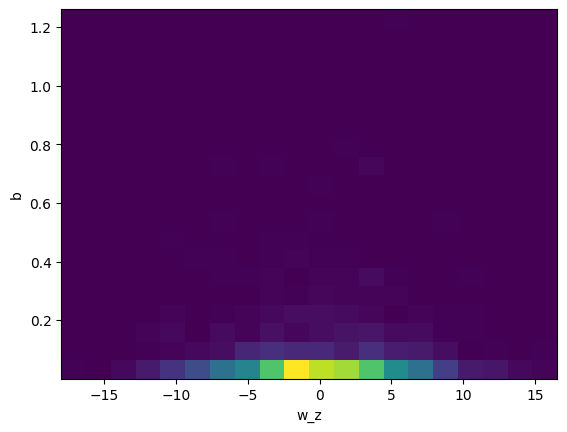

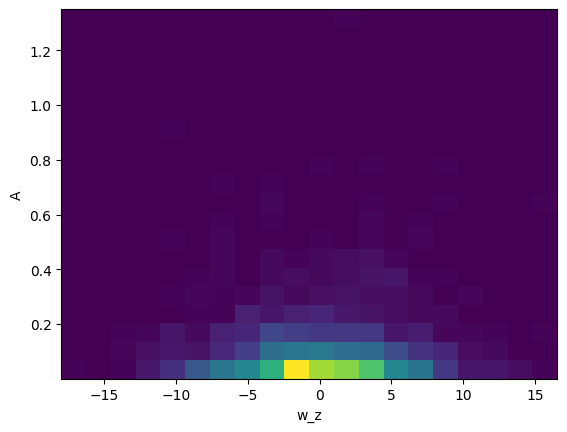

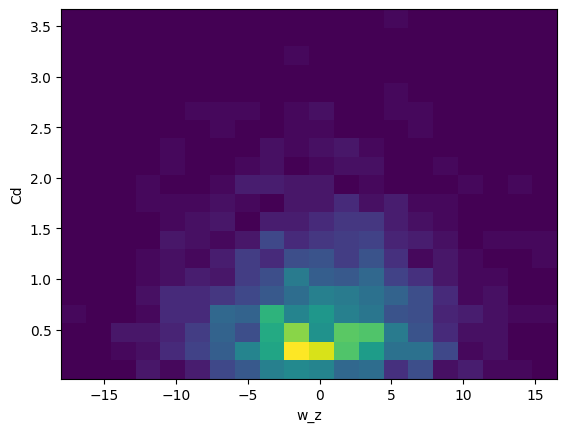

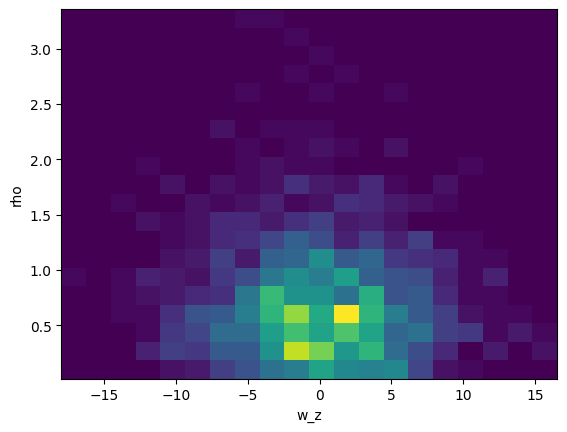

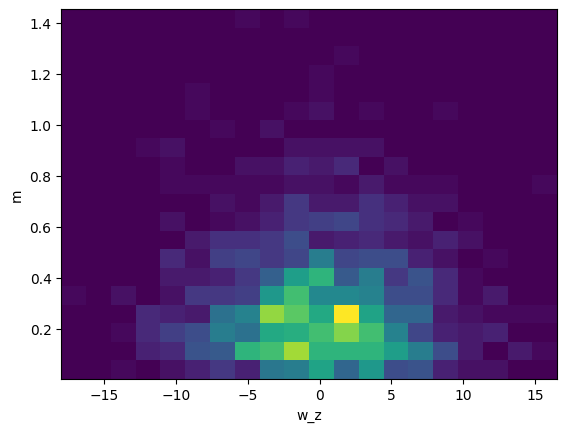

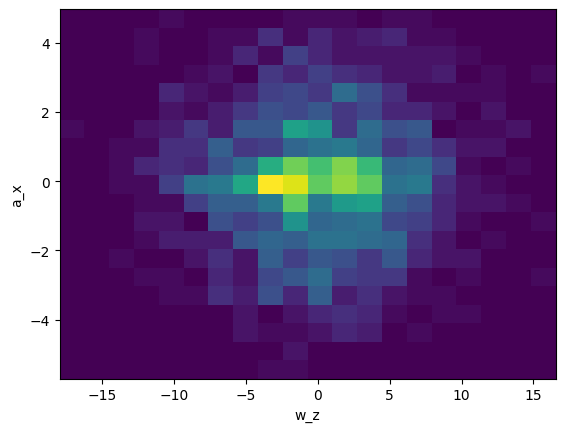

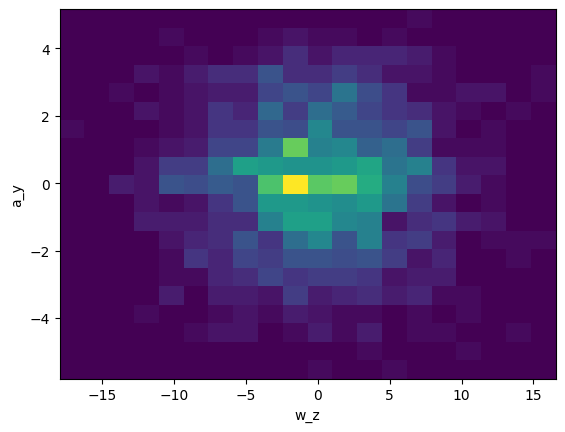

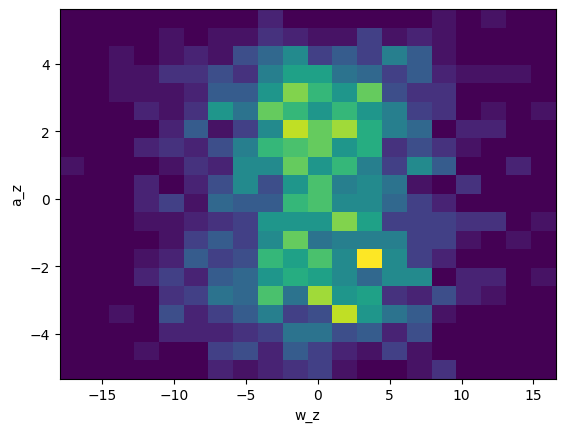

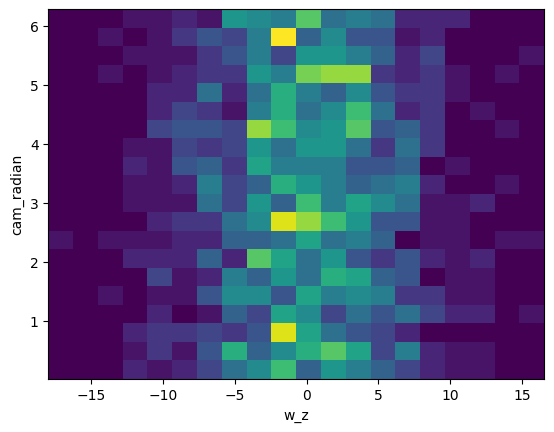

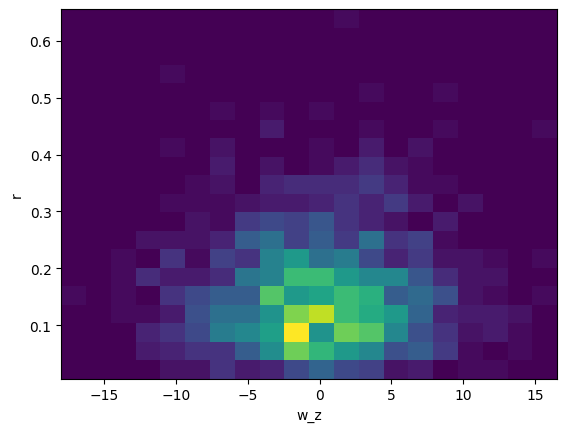

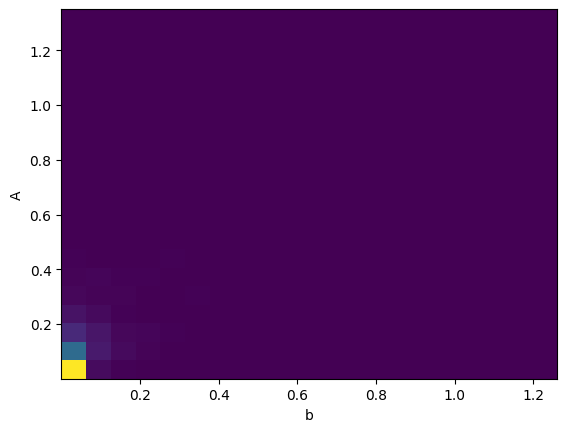

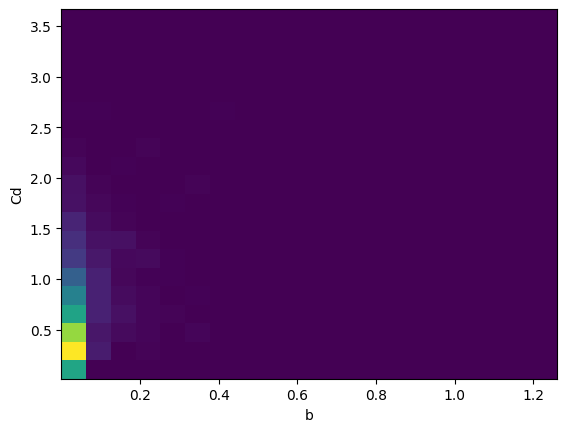

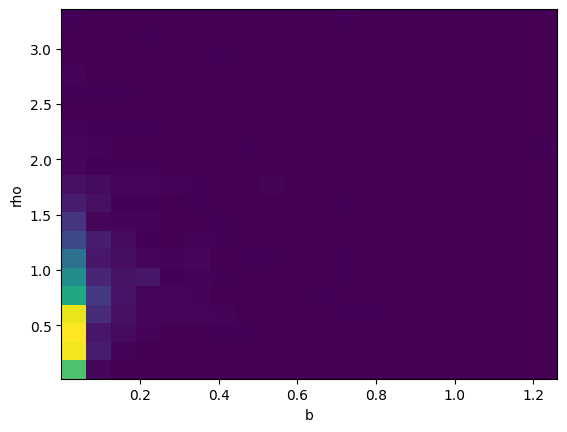

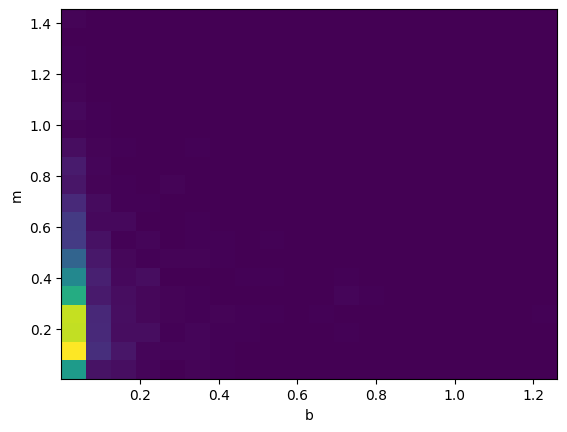

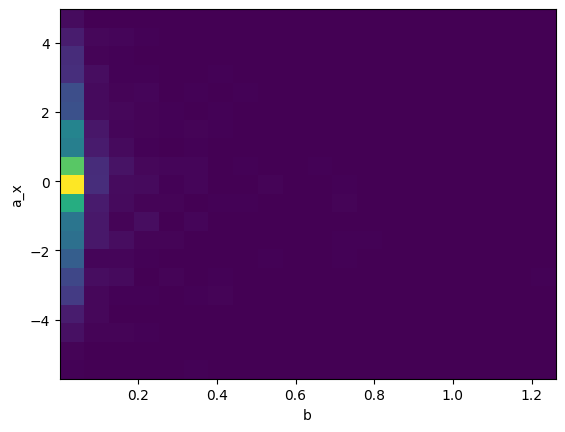

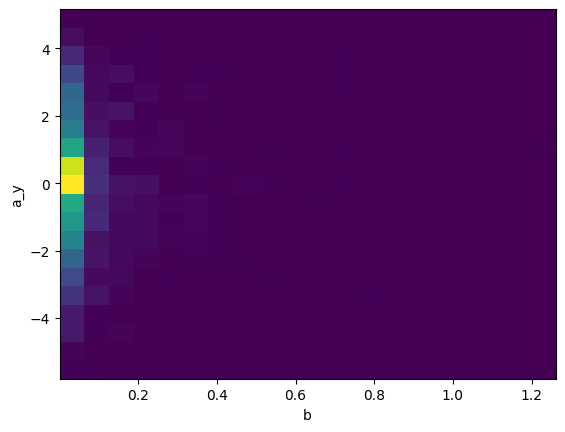

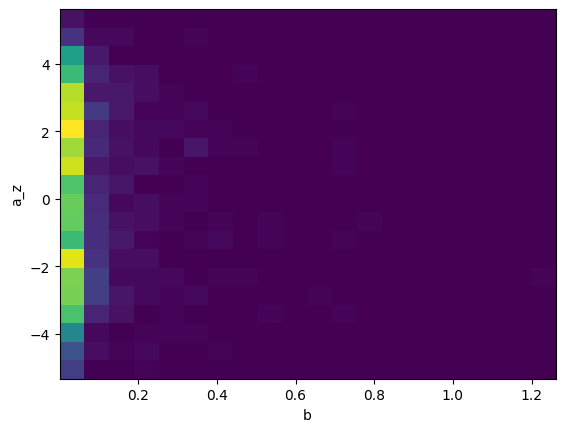

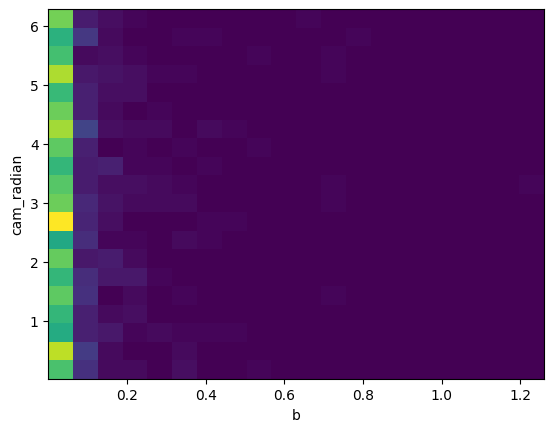

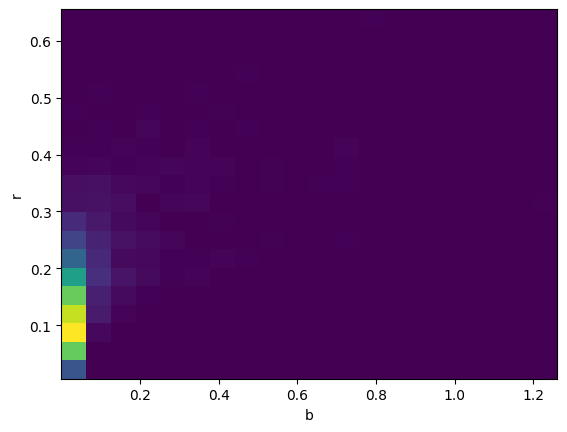

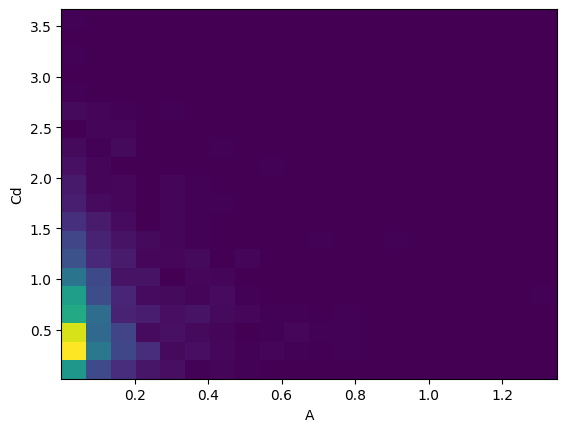

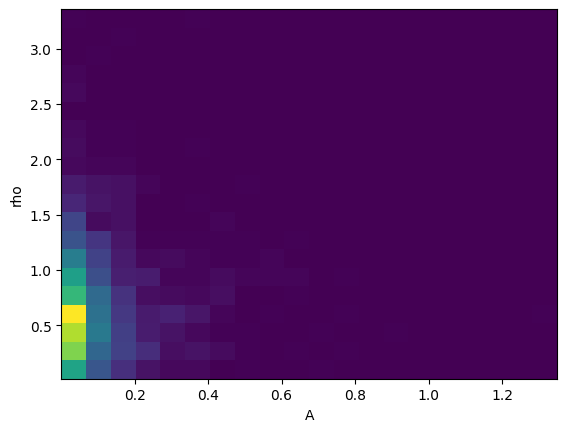

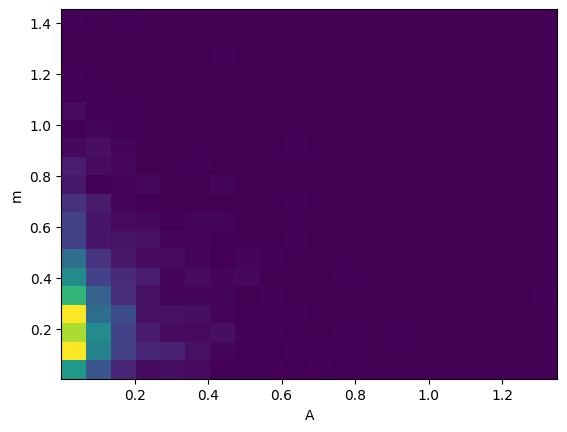

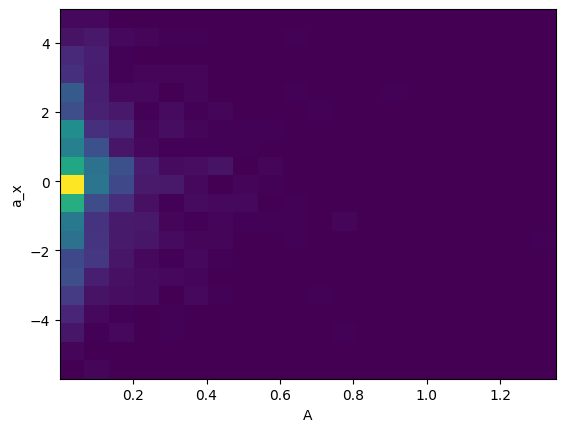

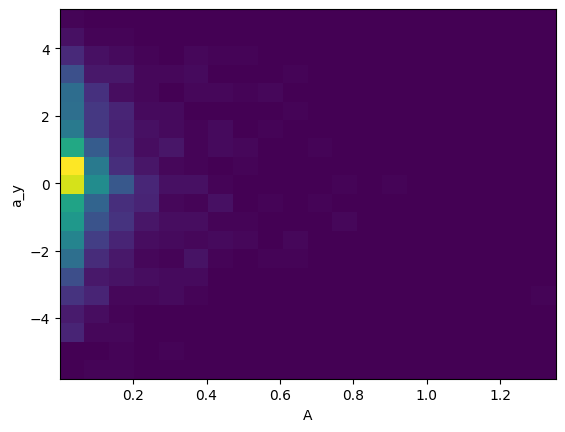

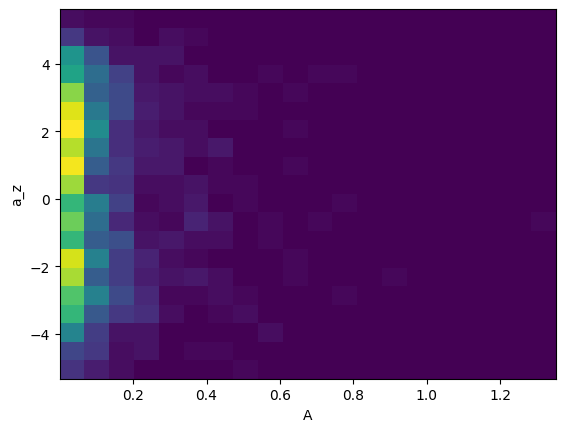

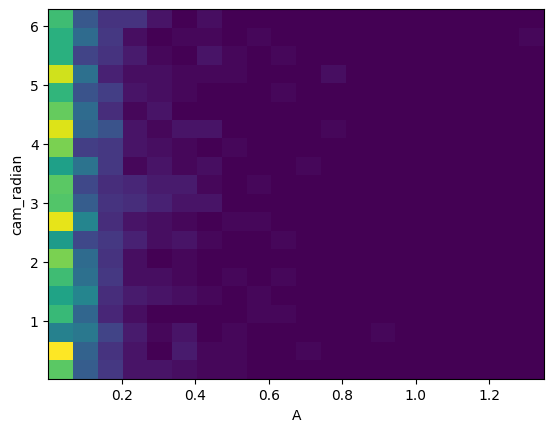

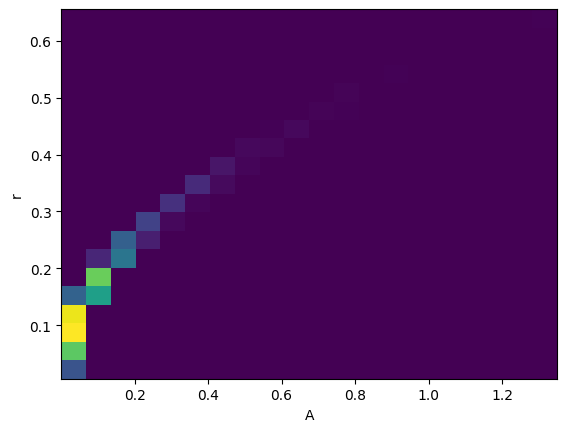

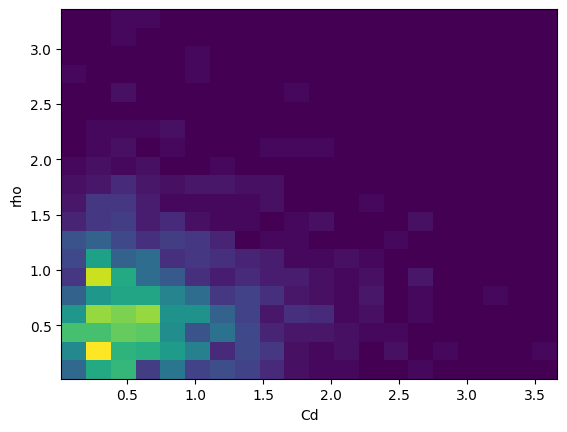

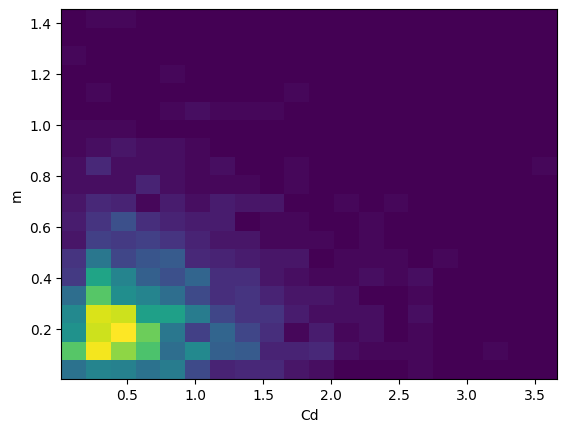

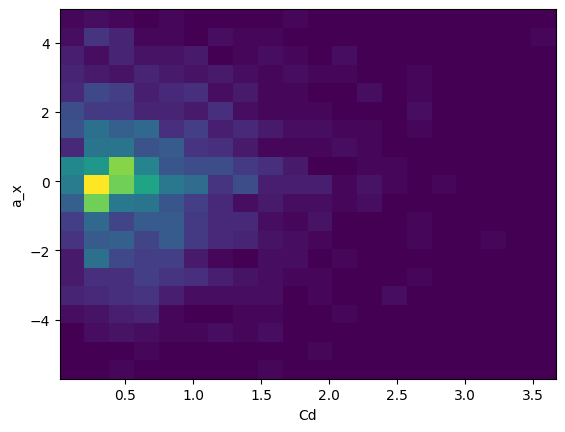

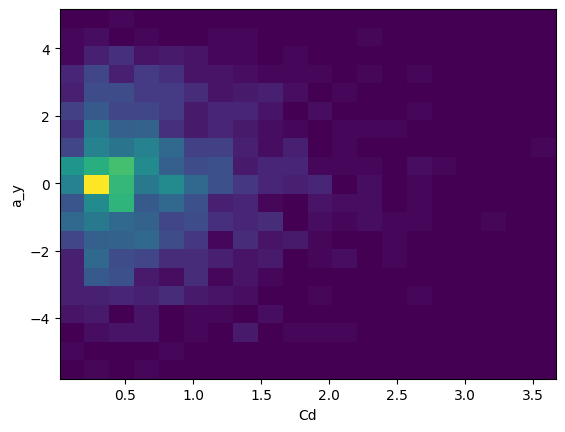

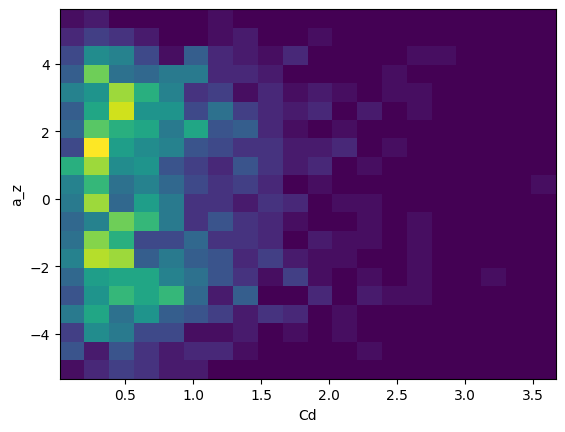

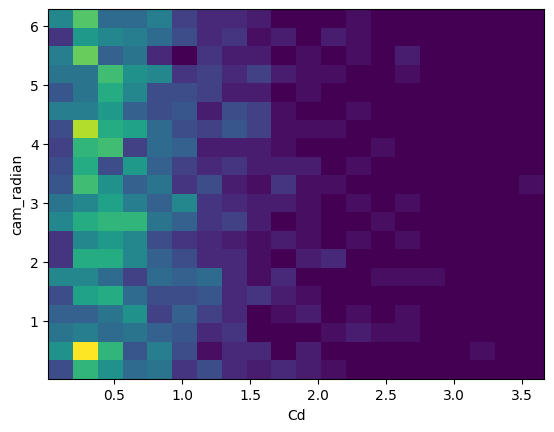

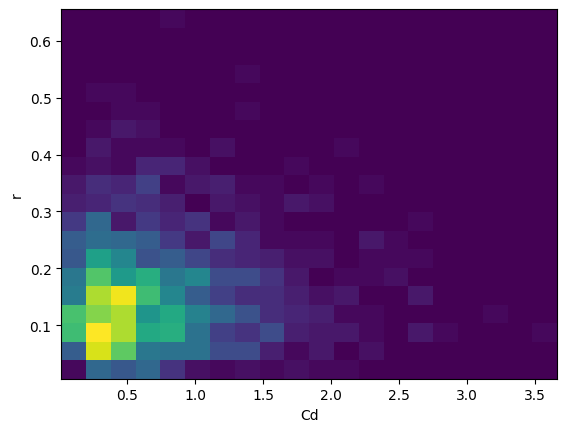

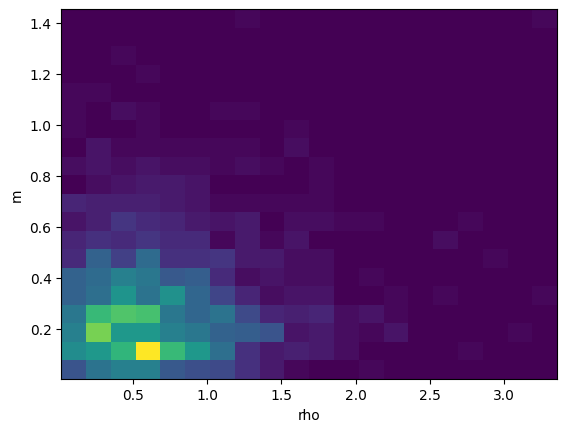

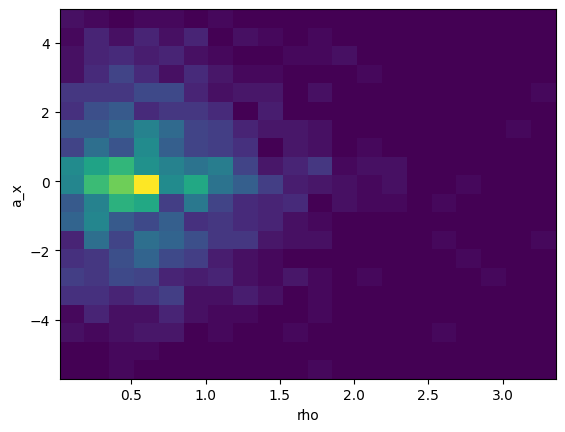

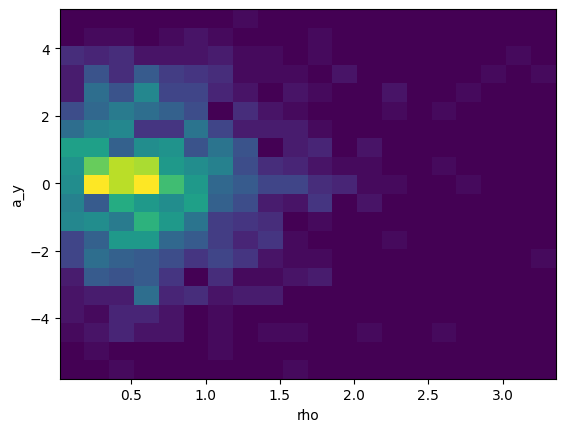

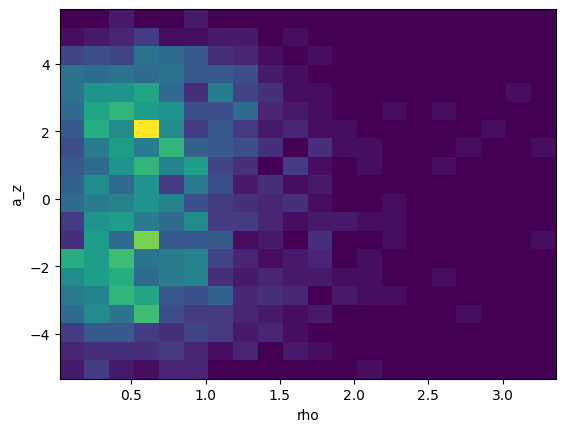

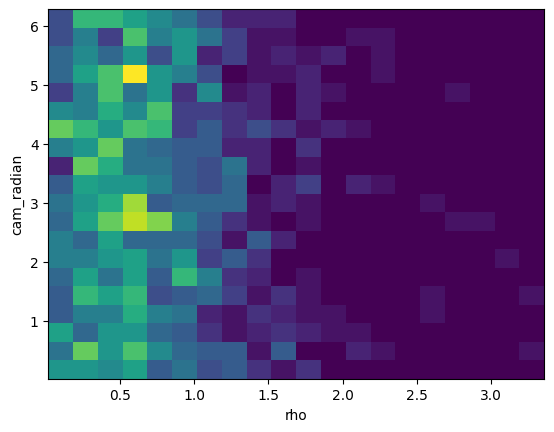

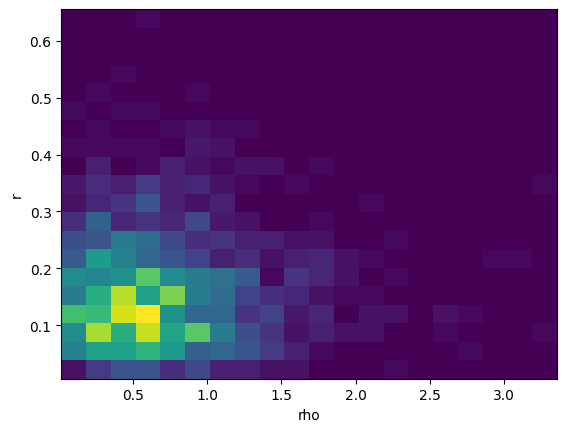

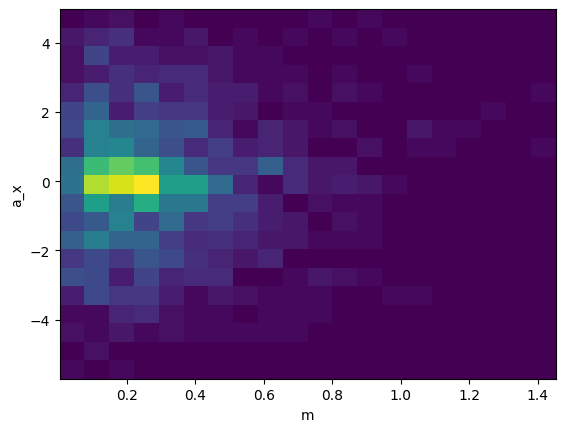

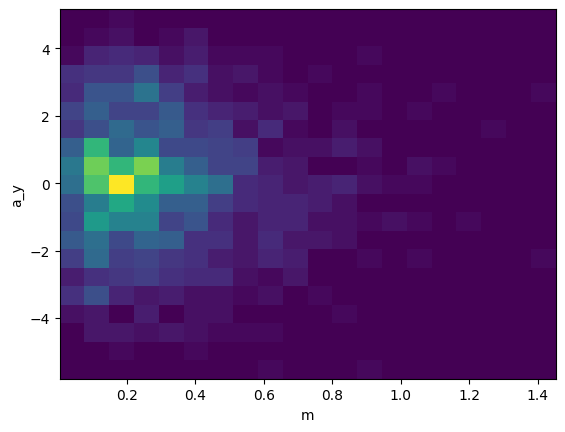

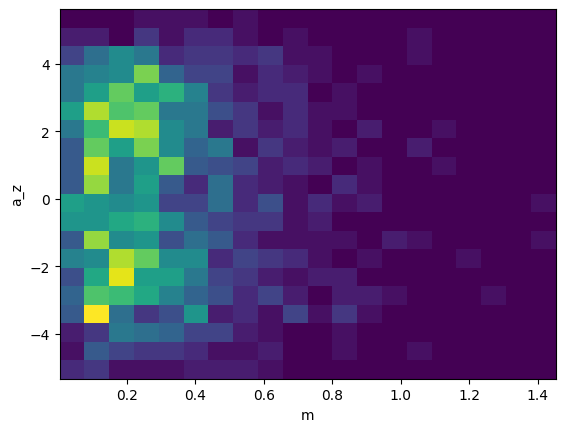

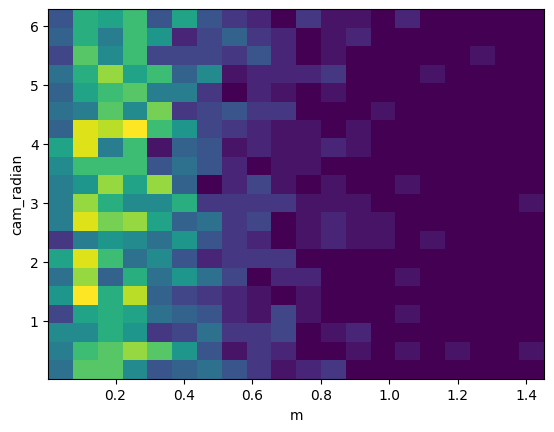

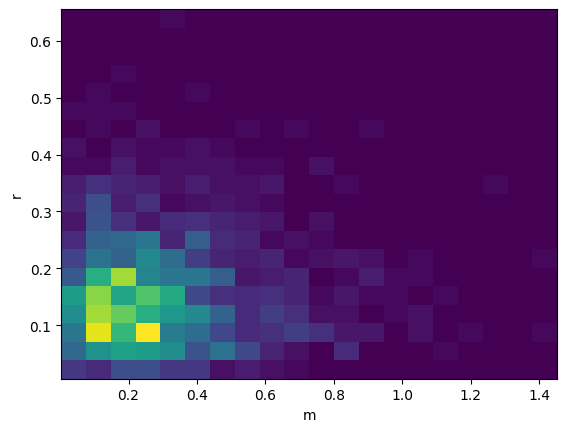

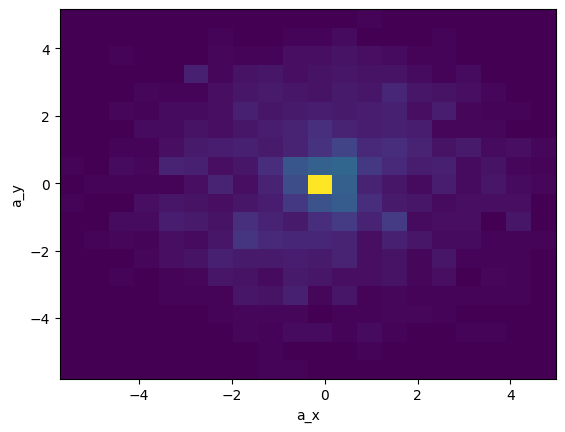

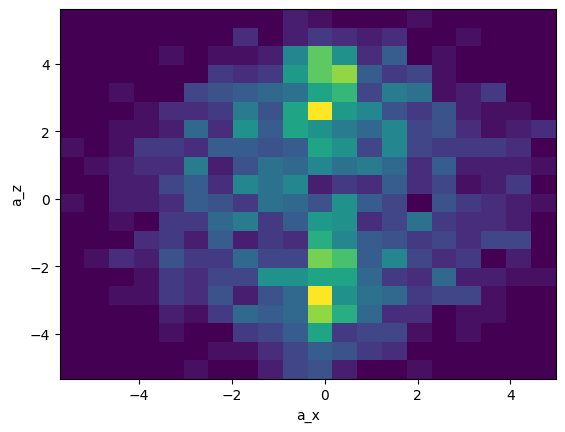

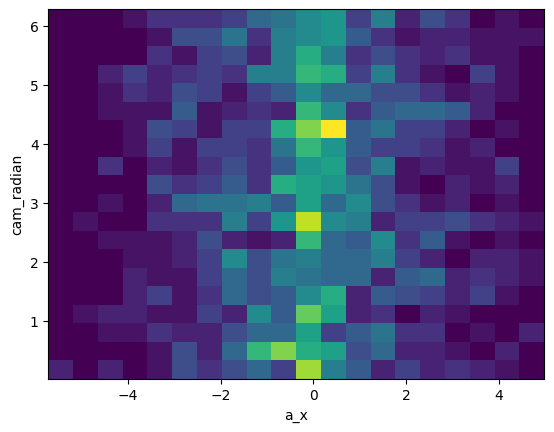

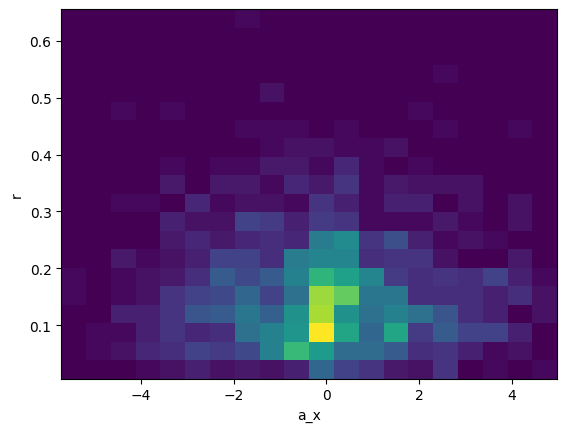

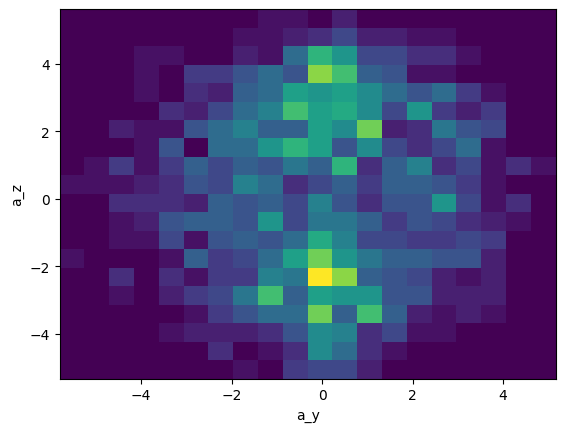

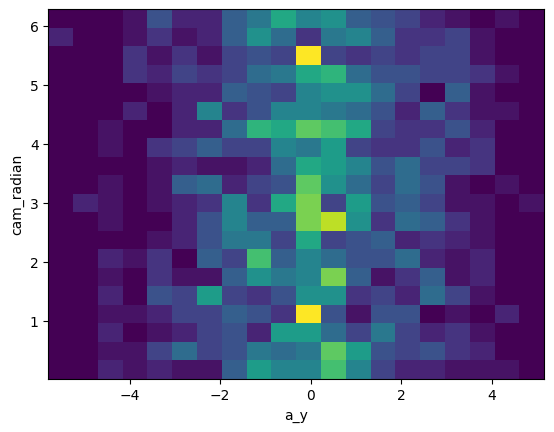

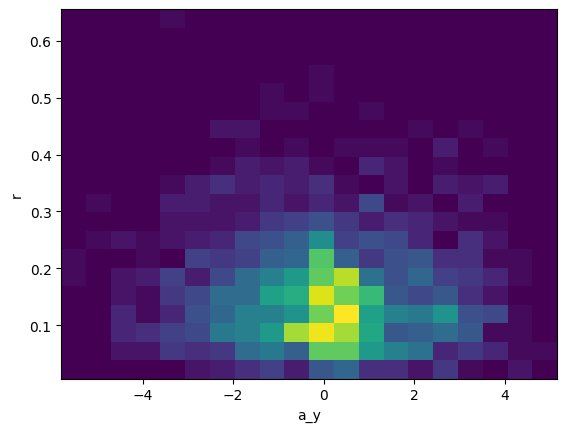

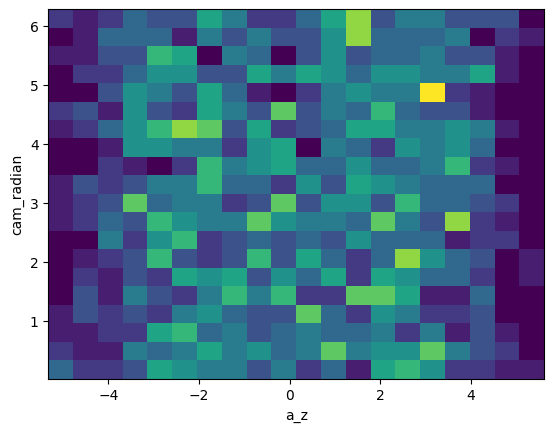

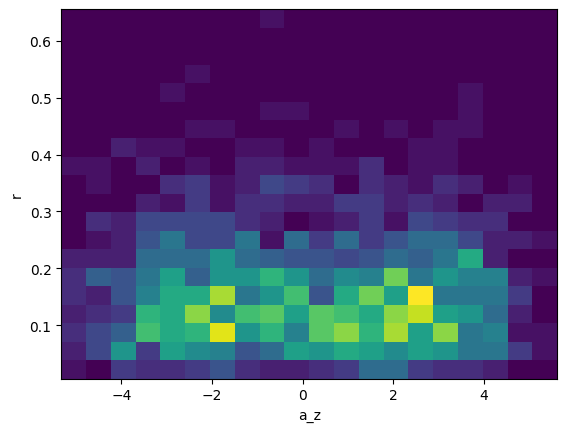

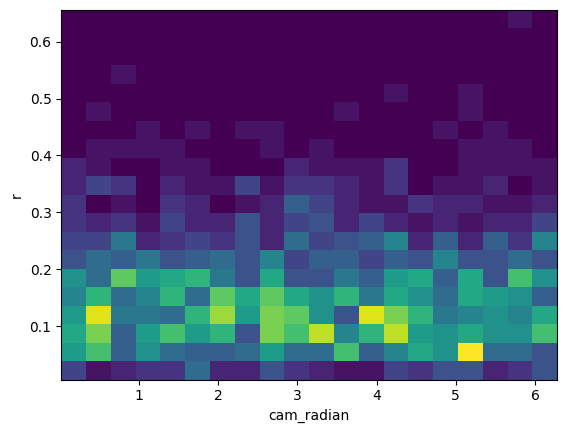

In [12]:
# plot 2d hist of all pairs

for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        plt.hist2d(df.iloc[:, i], df.iloc[:, j], bins=20)
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.show()

(0.0, 90.0)

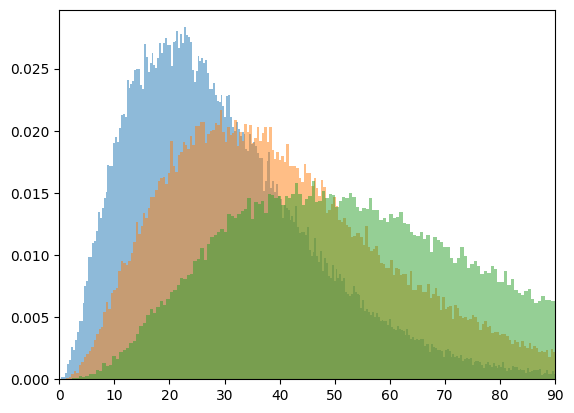

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# test different gamma functions

x = np.random.gamma(3, 10, 100000)
y = np.random.gamma(3.5, 12, 100000)
z = np.random.gamma(4, 15, 100000)

plt.hist(x, bins=500, density=True, alpha=0.5);
plt.hist(y, bins=500, density=True, alpha=0.5);
plt.hist(z, bins=500, density=True, alpha=0.5);
plt.xlim(0, 90)